<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transformation-des-variables-qualitatives" data-toc-modified-id="Transformation-des-variables-qualitatives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transformation des variables qualitatives</a></span></li><li><span><a href="#Les-outils" data-toc-modified-id="Les-outils-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Les outils</a></span><ul class="toc-item"><li><span><a href="#Les-Régressions" data-toc-modified-id="Les-Régressions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Les Régressions</a></span></li></ul></li></ul></div>

In [1]:
import time
import os
os.chdir(r"C:\Solutions\donnees\regression")

import pandas as pd
import seaborn as sns

%pylab inline

warnings.filterwarnings(action="ignore")
plt.style.use('seaborn-poster')
sns.set(font_scale=3)
np.random.seed(123456789)

Populating the interactive namespace from numpy and matplotlib


# Transformation des variables qualitatives

In [2]:
def createColumnsQualitatives(donnees,col):
    var = donnees[col].unique()
    var.sort()
    for i in donnees[col].unique():
        nom = col+'_'+str(i)
        donnees[nom] = donnees[col].apply(lambda x : 1 if x==i else 0)
    donnees.drop(labels=col, axis=1, inplace=True)

# Les outils

In [3]:
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [4]:
def getMetrics(val_reels, val_predites):
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    return sqrt(mean_squared_error(val_reels, val_predites)),sqrt(abs(r2_score(val_reels, val_predites))),correlations.astype(float).corr().valeurs[0]   

In [5]:
def affichageMetricsAvecLog(val_reels, val_predites):
    print("Mean absolute error                 MAE   : %.6f" % mean_absolute_error(val_reels, val_predites))
    print("Median absolute error               MedAE : %.6f" % median_absolute_error(val_reels, val_predites))
    print("Mean squared error                  MSE   : %.6f" % mean_squared_error(val_reels, val_predites))
    print("Mean squared logarithmic error      MSLE  : %.6f" % mean_squared_log_error(val_reels, val_predites))
    print("Root mean squared error             RMSE  : %.6f" % sqrt(mean_squared_error(val_reels, val_predites)))
    print("Root mean squared logarithmic error RMSLE : %.6f" % sqrt(mean_squared_log_error(val_reels, val_predites)))
    print("R² score  raw_values                R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='raw_values'))
    print("R² score  uniform_average           R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='uniform_average'))
    print("R² score  variance_weighted         R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='variance_weighted'))
    print("R  score  raw_values                R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='raw_values'))))
    print("R  score  uniform_average           R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='uniform_average'))))
    print("R  score  variance_weighted         R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='variance_weighted'))))
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    sns.set(font_scale=3)
    plt.figure(figsize=(26,26))
    plt.title('Correlation Pearson des variables', y=1.05, size=38)
    sns.heatmap(correlations.astype(float).corr(),linewidths=0.3,vmax=1.0,fmt ="1.9f", 
                square=True, cmap='coolwarm', linecolor='white', annot=True)
    plt.show()    
    plt.figure(figsize=(26,26))
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.4, s=200, c='black', edgecolors='white')
    plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.3, 
                s=200+abs(correlations.valeurs - correlations.predictions)*100, c='red', edgecolors='black')
    plt.plot((correlations.valeurs.min(), correlations.valeurs.max()), 
             (correlations.valeurs.min(), correlations.valeurs.max()), c='black', ls="--", alpha=0.6) 
    plt.xlabel('valeurs')
    plt.ylabel('predictions')
    plt.show()    
    
    sns.jointplot(x='valeurs',y='predictions',data=correlations, kind='reg', size=25)

In [6]:
def affichageMetricsSansLog(val_reels, val_predites):
    print("Mean absolute error                 MAE   : %.6f" % mean_absolute_error(val_reels, val_predites))
    print("Median absolute error               MedAE : %.6f" % median_absolute_error(val_reels, val_predites))
    print("Mean squared error                  MSE   : %.6f" % mean_squared_error(val_reels, val_predites))
    #print("Mean squared logarithmic error      MSLE  : %.6f" % mean_squared_log_error(val_reels, val_predites))
    print("Root mean squared error             RMSE  : %.6f" % sqrt(mean_squared_error(val_reels, val_predites)))
    #print("Root mean squared logarithmic error RMSLE : %.6f" % sqrt(mean_squared_log_error(val_reels, val_predites)))
    print("R² score  raw_values                R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='raw_values'))
    print("R² score  uniform_average           R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='uniform_average'))
    print("R² score  variance_weighted         R²    : %.6f" % r2_score(val_reels, val_predites, multioutput='variance_weighted'))
    print("R  score  raw_values                R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='raw_values'))))
    print("R  score  uniform_average           R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='uniform_average'))))
    print("R  score  variance_weighted         R     : %.6f" % sqrt(abs(r2_score(val_reels, val_predites, multioutput='variance_weighted'))))
    correlations = pd.DataFrame(list(zip(val_predites,val_reels)), columns=['predictions','valeurs'])
    sns.set(font_scale=3)
    plt.figure(figsize=(26,26))
    plt.title('Correlation Pearson des variables', y=1.05, size=38)
    sns.heatmap(correlations.astype(float).corr(),linewidths=0.3,vmax=1.0,fmt ="1.9f", 
                square=True, cmap='coolwarm', linecolor='white', annot=True)
    plt.show()    
    #plt.figure(figsize=(26,26))
    #plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.4, s=200, c='black', edgecolors='white')
    #plt.scatter(correlations.valeurs,correlations.predictions, alpha=0.3, 
    #            s=200+abs(correlations.valeurs - correlations.predictions)*100, c='red', edgecolors='black')
    #plt.plot((correlations.valeurs.min(), correlations.valeurs.max()), 
    #         (correlations.valeurs.min(), correlations.valeurs.max()), c='black', ls="--", alpha=0.6) 
    #plt.xlabel('valeurs')
    #plt.ylabel('predictions')
    #plt.show()   
    
    sns.jointplot(x='valeurs',y='predictions',
                  data=correlations.iloc[::10,:], kind='reg', size=25)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.figure(figsize=(26,26))    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)     

In [8]:
def afficheDistributions(donnees):
    for i in donnees.columns:
        plt.title('distribution %s' % i)
        donnees[i].hist(figsize=(16,14),bins=50, color='navy',edgecolor='white')
        plt.show()    

## Les Régressions

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,BayesianRidge
from sklearn.linear_model import RANSACRegressor,ARDRegression,OrthogonalMatchingPursuit
from sklearn.linear_model import SGDRegressor,TheilSenRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.neural_network import MLPRegressor

def calculRegressions(X_train, X_test, y_train, y_test):
    rmse,r,p = dict(),dict(),dict()
    
    yRegressions = pd.DataFrame()
    yRegressions['Observations']=y_test

    noms = ["LinearRegression",
            "PolynomialRegression2",
            #"PolynomialRegression3",
            #"PolynomialRegression4",
            "BayesianRidge",
            "MLPRegressor",
            "SVR_linear",
            "SVR_rbf",
            #"SVR_poly2",# "SVR_poly3","SVR_poly4",
            #"SVR_sigmoid",
            "RandomForestRegressor",
            "GradientBoostingRegressor"]

    regresseurs = [
        LinearRegression(),
        make_pipeline(PolynomialFeatures(2), Ridge()),
        BayesianRidge(alpha_1=1.0e-7),
        MLPRegressor(alpha=0.0001, hidden_layer_sizes = (100,), 
                     max_iter = 5000, 
                     activation = 'logistic',
                     learning_rate = 'adaptive'),
        SVR(kernel='linear', C=0.001),
        SVR(kernel='rbf', C=1e3, gamma=0.0001),
        RandomForestRegressor(max_depth=4, n_estimators=500),
        GradientBoostingRegressor(loss='quantile', alpha=0.95,
                                    n_estimators=500, max_depth=3,
                                    learning_rate=.1, min_samples_leaf=9,
                                    min_samples_split=9)   ]

    for nom, reg in zip(noms, regresseurs):
        t1 = time.time()  
        yRegressions[nom] = reg.fit(X_train, y_train).predict(X_test)
        rmse[nom],r[nom],p[nom] = getMetrics(y_test, yRegressions[nom])
        print('Exécution  '+nom.ljust(30)+(': %.2fs' % (time.time() - t1)).lstrip('0')+('  p = %.12f' % p[nom]).lstrip('0'))

    resultats = pd.DataFrame(pd.Series(rmse),columns=["RMSE"])
    resultats["R"] = pd.Series(r)
    resultats["Pearson"] = pd.Series(p)
    resultats.sort_values(by='Pearson',ascending=False, inplace=True)
    return resultats,yRegressions

In [10]:
donnees = pd.read_csv('California Housing Price.csv')

In [11]:
#createColumnsQualitatives(donnees,'ocean_proximity')

In [12]:
donnees.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
donnees.shape

(20640, 10)

In [14]:
def fVarQ ( col ):
    dicoOP = { nom:i for i,nom in enumerate(col.unique())}
    dicoOPInv = { i:nom for i,nom in enumerate(col.unique())}
    col.apply(lambda x : dicoOP[x]),dicoOP,dicoOPInv

In [15]:
dicoOP = { nom:i for i,nom in enumerate(donnees.ocean_proximity.unique())}
dicoOPInv = { i:nom for i,nom in enumerate(donnees.ocean_proximity.unique())}

In [16]:
donnees.ocean_proximity = donnees.ocean_proximity.apply(lambda x : dicoOP[x])

In [17]:
dicoOPInv

{0: 'NEAR BAY', 1: '<1H OCEAN', 2: 'INLAND', 3: 'NEAR OCEAN', 4: 'ISLAND'}

In [18]:
donnees.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [19]:
donnees.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
donnees.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

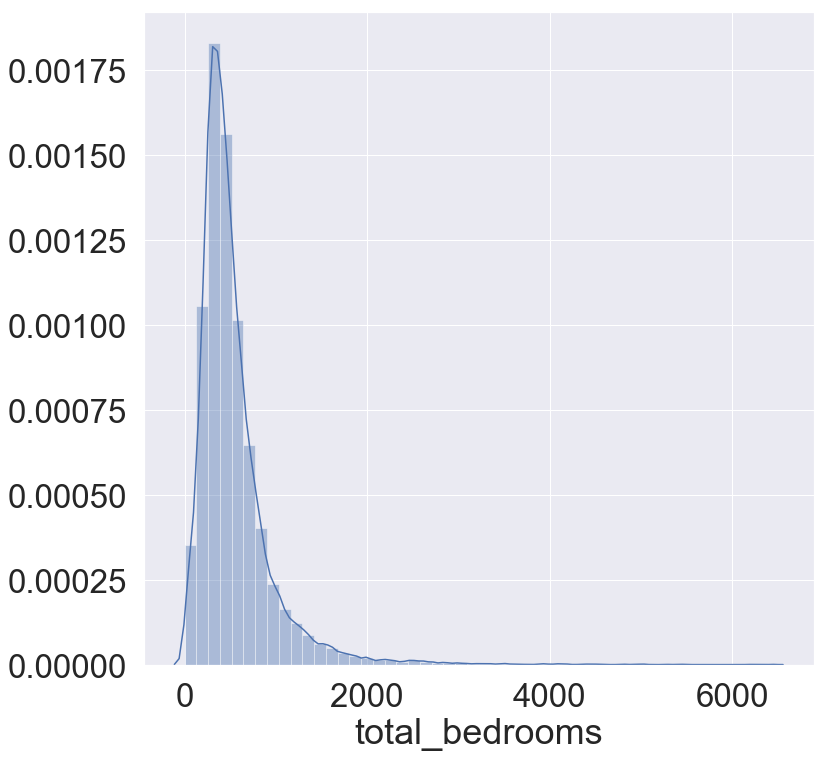

In [21]:
plt.figure(figsize=(12,12))
sns.distplot(donnees[(~donnees.total_bedrooms.isna())]['total_bedrooms']);
#sns.distplot(donnees[(donnees.total_bedrooms.isna())]['total_rooms']);

In [22]:
donnees[['total_rooms','total_bedrooms', 'households','population']].corr()

,total_rooms,total_bedrooms,households,population
total_rooms,1.000000,0.930380,0.918484,0.857126
total_bedrooms,0.930380,1.000000,0.979728,0.877747
households,0.918484,0.979728,1.000000,0.907222
population,0.857126,0.877747,0.907222,1.000000


In [23]:
donnees.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,0.180381
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,-0.067586
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.204882
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.014818
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.008511
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.016911
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.129135
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,-0.210600
ocean_proximity,0.180381,-0.067586,-0.204882,0.014818,0.004081,-0.008511,-0.016911,-0.129135,-0.210600,1.000000


In [24]:
X = donnees[~donnees.total_bedrooms.isna()][['total_rooms','households','population']]
X.head()

,total_rooms,households,population
0,880.0,126.0,322.0
1,7099.0,1138.0,2401.0
2,1467.0,177.0,496.0
3,1274.0,219.0,558.0
4,1627.0,259.0,565.0


In [25]:
y = donnees[~donnees.total_bedrooms.isna()].total_bedrooms.ravel()
y.shape

(20433,)

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(0.7599224681698615, array([ 0.03986646,  0.96043235, -0.03345354]))

In [27]:
y = lin_reg.predict(donnees[donnees.total_bedrooms.isna()][['total_rooms','households','population']])

In [28]:
donnees.total_bedrooms[donnees.total_bedrooms.isna()] = y

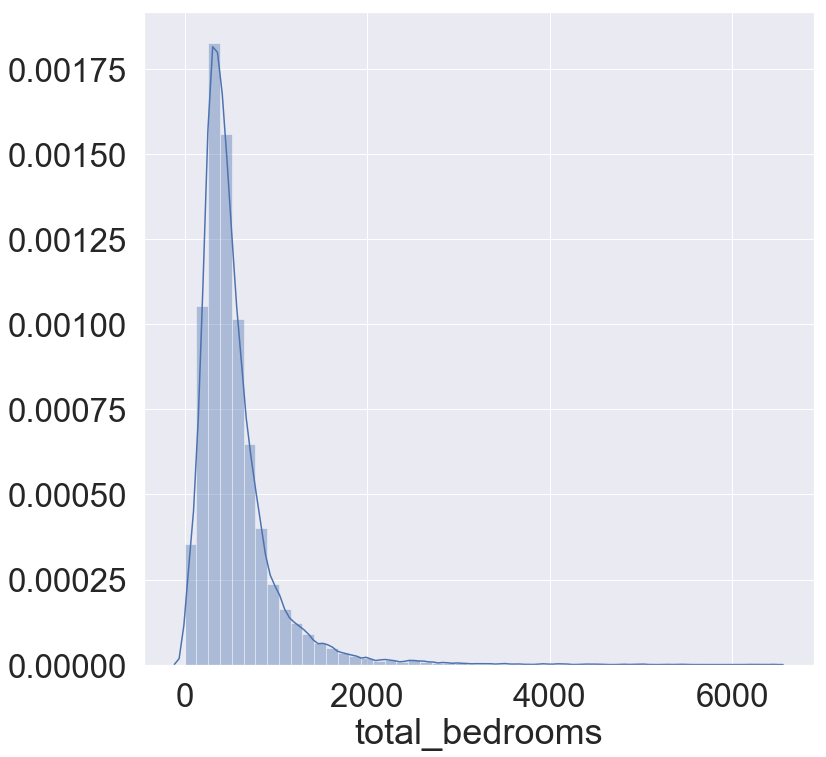

In [29]:
plt.figure(figsize=(12,12))
#sns.distplot(donnees[(~donnees.total_bedrooms.isna())]['total_bedrooms']);
sns.distplot(donnees['total_bedrooms']);

In [30]:
donnees.total_bedrooms.isna().sum()

0

In [31]:
donnees.dropna(inplace=True)

In [32]:
donnees.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

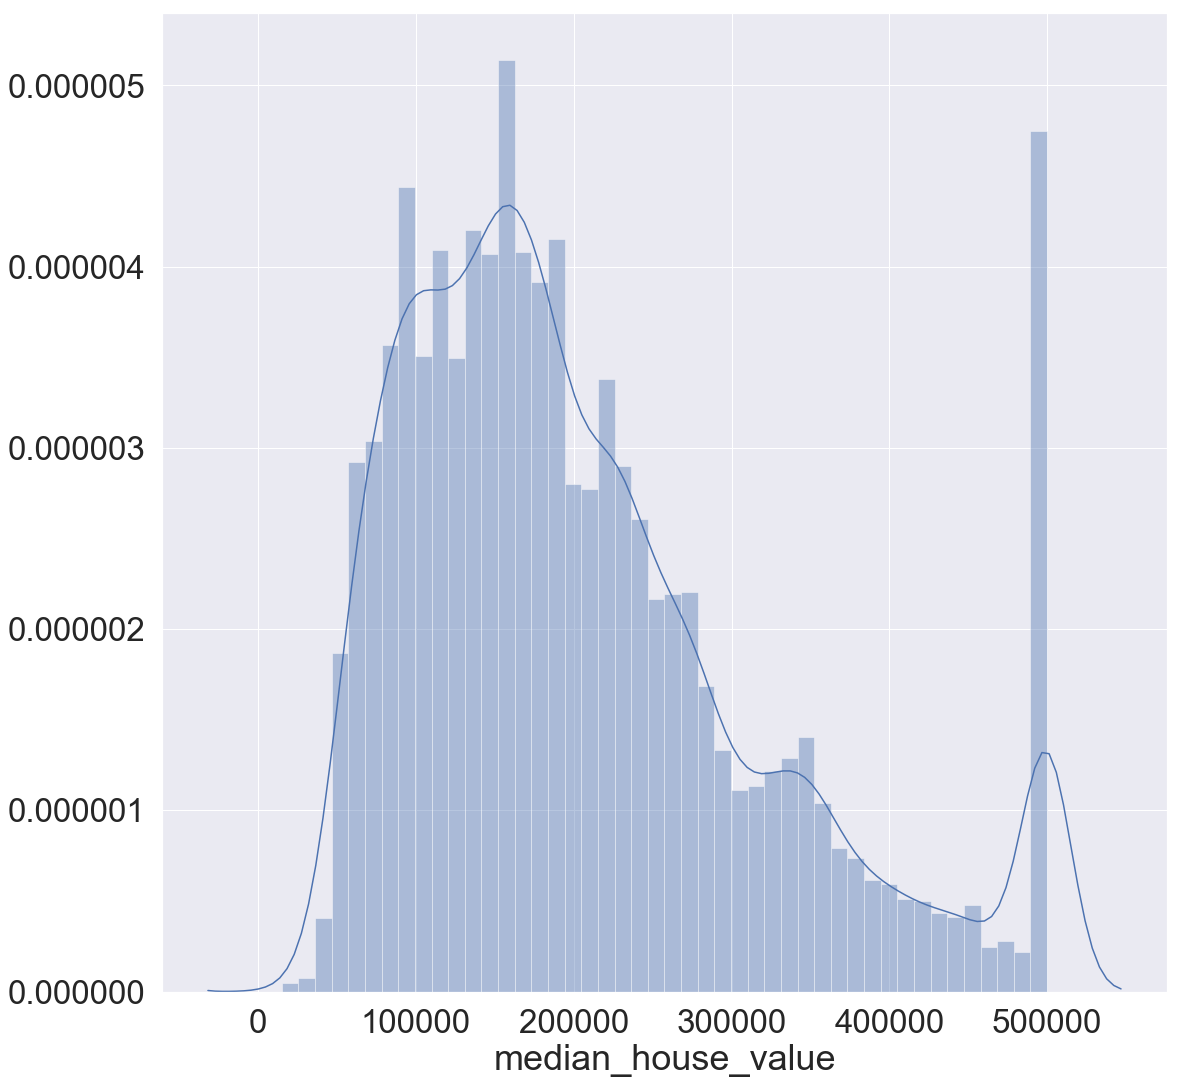

In [33]:
plt.figure(figsize=(18,18))
sns.distplot(donnees['median_house_value']);

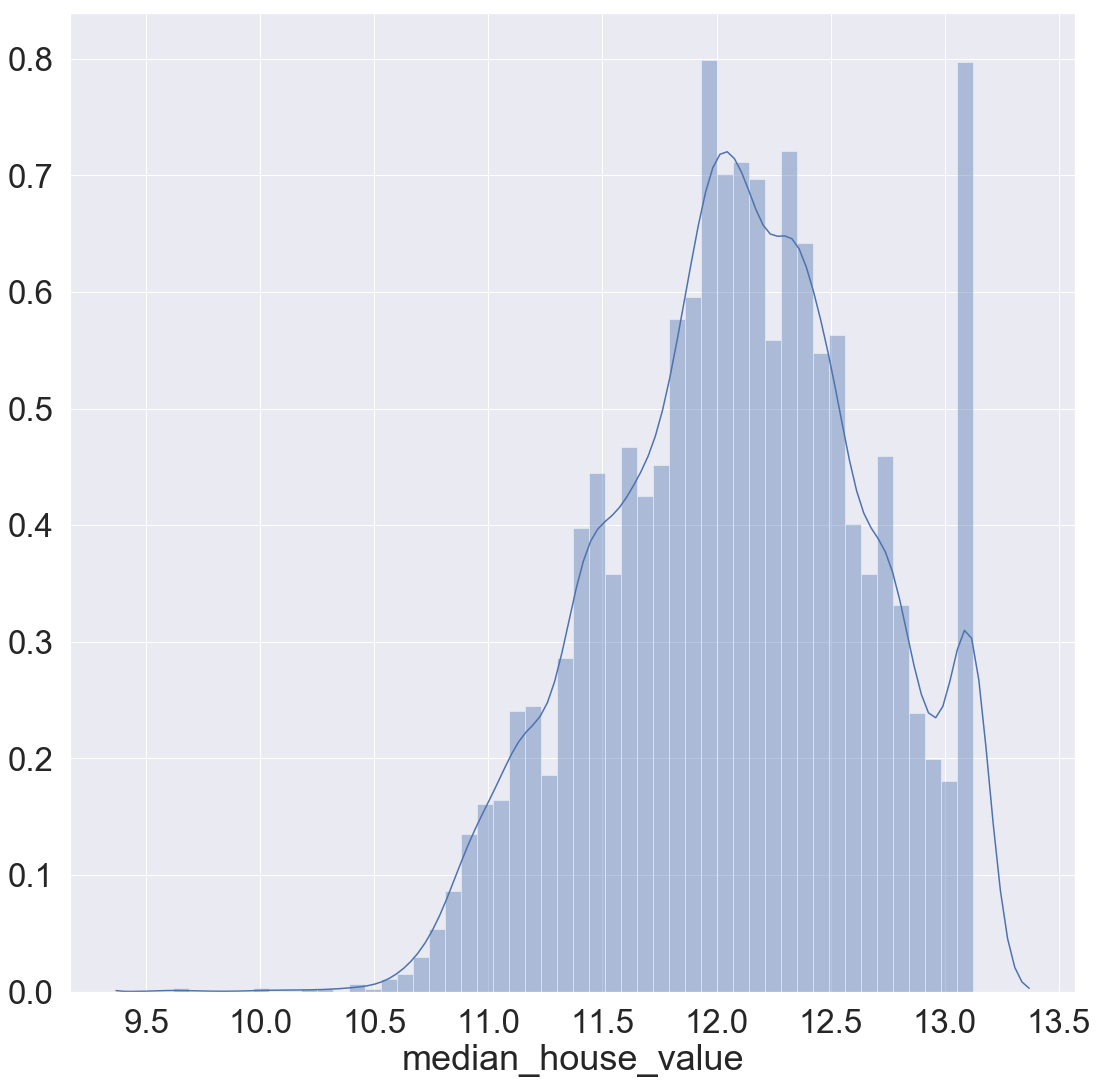

In [34]:
plt.figure(figsize=(18,18))
sns.distplot(np.log(donnees['median_house_value']));

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(donnees.drop(columns='median_house_value'), 
                                                    donnees.median_house_value, 
                                                    test_size=0.4, random_state=101)

In [36]:
resultats,yRegressions = calculRegressions(X_train, X_test, y_train, y_test)

Exécution  LinearRegression              : 0.03s  p = 0.789012013838
Exécution  PolynomialRegression2         : 0.05s  p = 0.677833759208
Exécution  BayesianRidge                 : 0.02s  p = 0.789012220165
Exécution  MLPRegressor                  : 325.62s  p = 0.000000669378
Exécution  SVR_linear                    : 7.83s  p = 0.317138727766
Exécution  SVR_rbf                       : 19.40s  p = 0.406831391955
Exécution  RandomForestRegressor         : 15.44s  p = 0.777586341044
Exécution  GradientBoostingRegressor     : 5.47s  p = 0.797552269689


In [37]:
resultats

,RMSE,R,Pearson
GradientBoostingRegressor,124175.451923,0.384345,7.975523e-01
BayesianRidge,71265.855484,0.788650,7.890122e-01
LinearRegression,71267.064619,0.788642,7.890120e-01
RandomForestRegressor,72967.238907,0.776983,7.775863e-01
PolynomialRegression2,94957.842742,0.573445,6.778338e-01
SVR_rbf,114868.587223,0.133691,4.068314e-01
SVR_linear,111471.357715,0.274056,3.171387e-01
MLPRegressor,210946.827969,1.520578,6.693779e-07


Mean absolute error                 MAE   : 51546.961496
Median absolute error               MedAE : 39328.242180
Mean squared error                  MSE   : 5078822157.896926
Root mean squared error             RMSE  : 71265.855484
R² score  raw_values                R²    : 0.621969
R² score  uniform_average           R²    : 0.621969
R² score  variance_weighted         R²    : 0.621969
R  score  raw_values                R     : 0.788650
R  score  uniform_average           R     : 0.788650
R  score  variance_weighted         R     : 0.788650


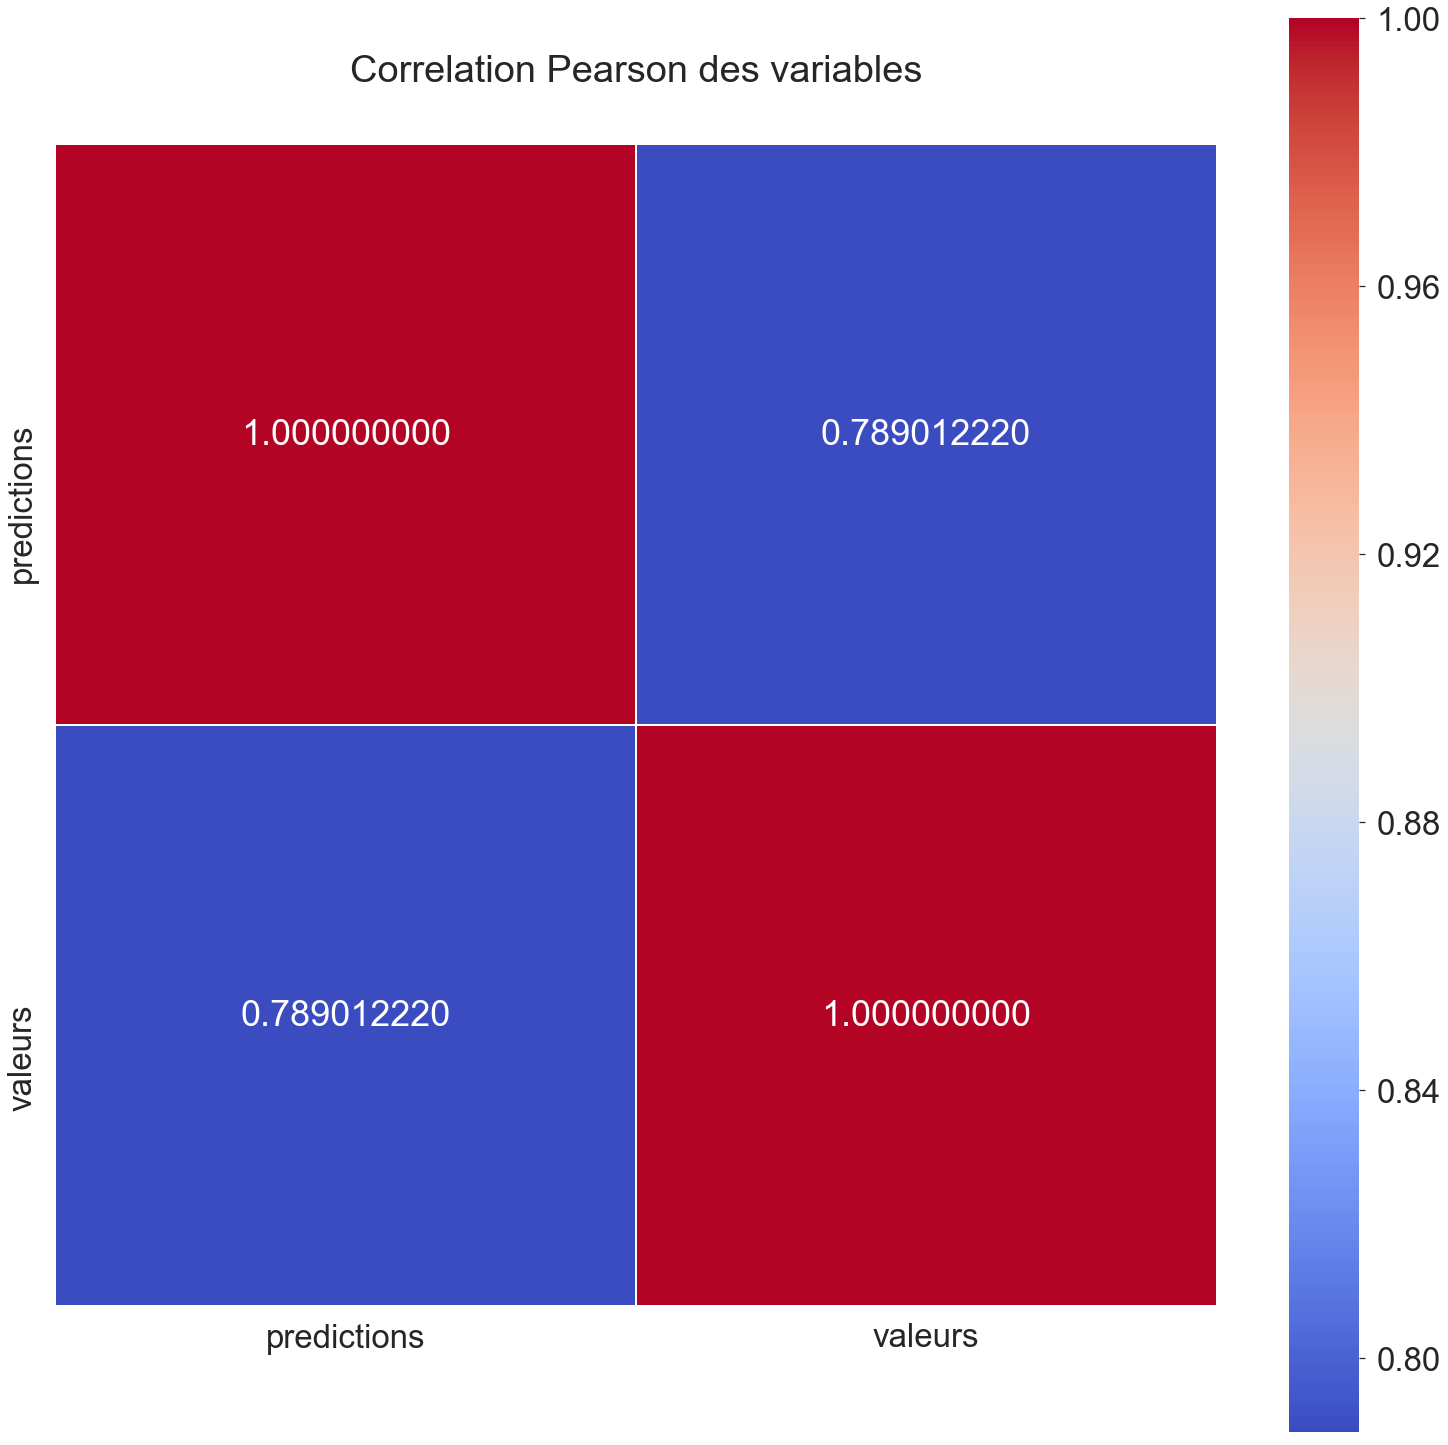

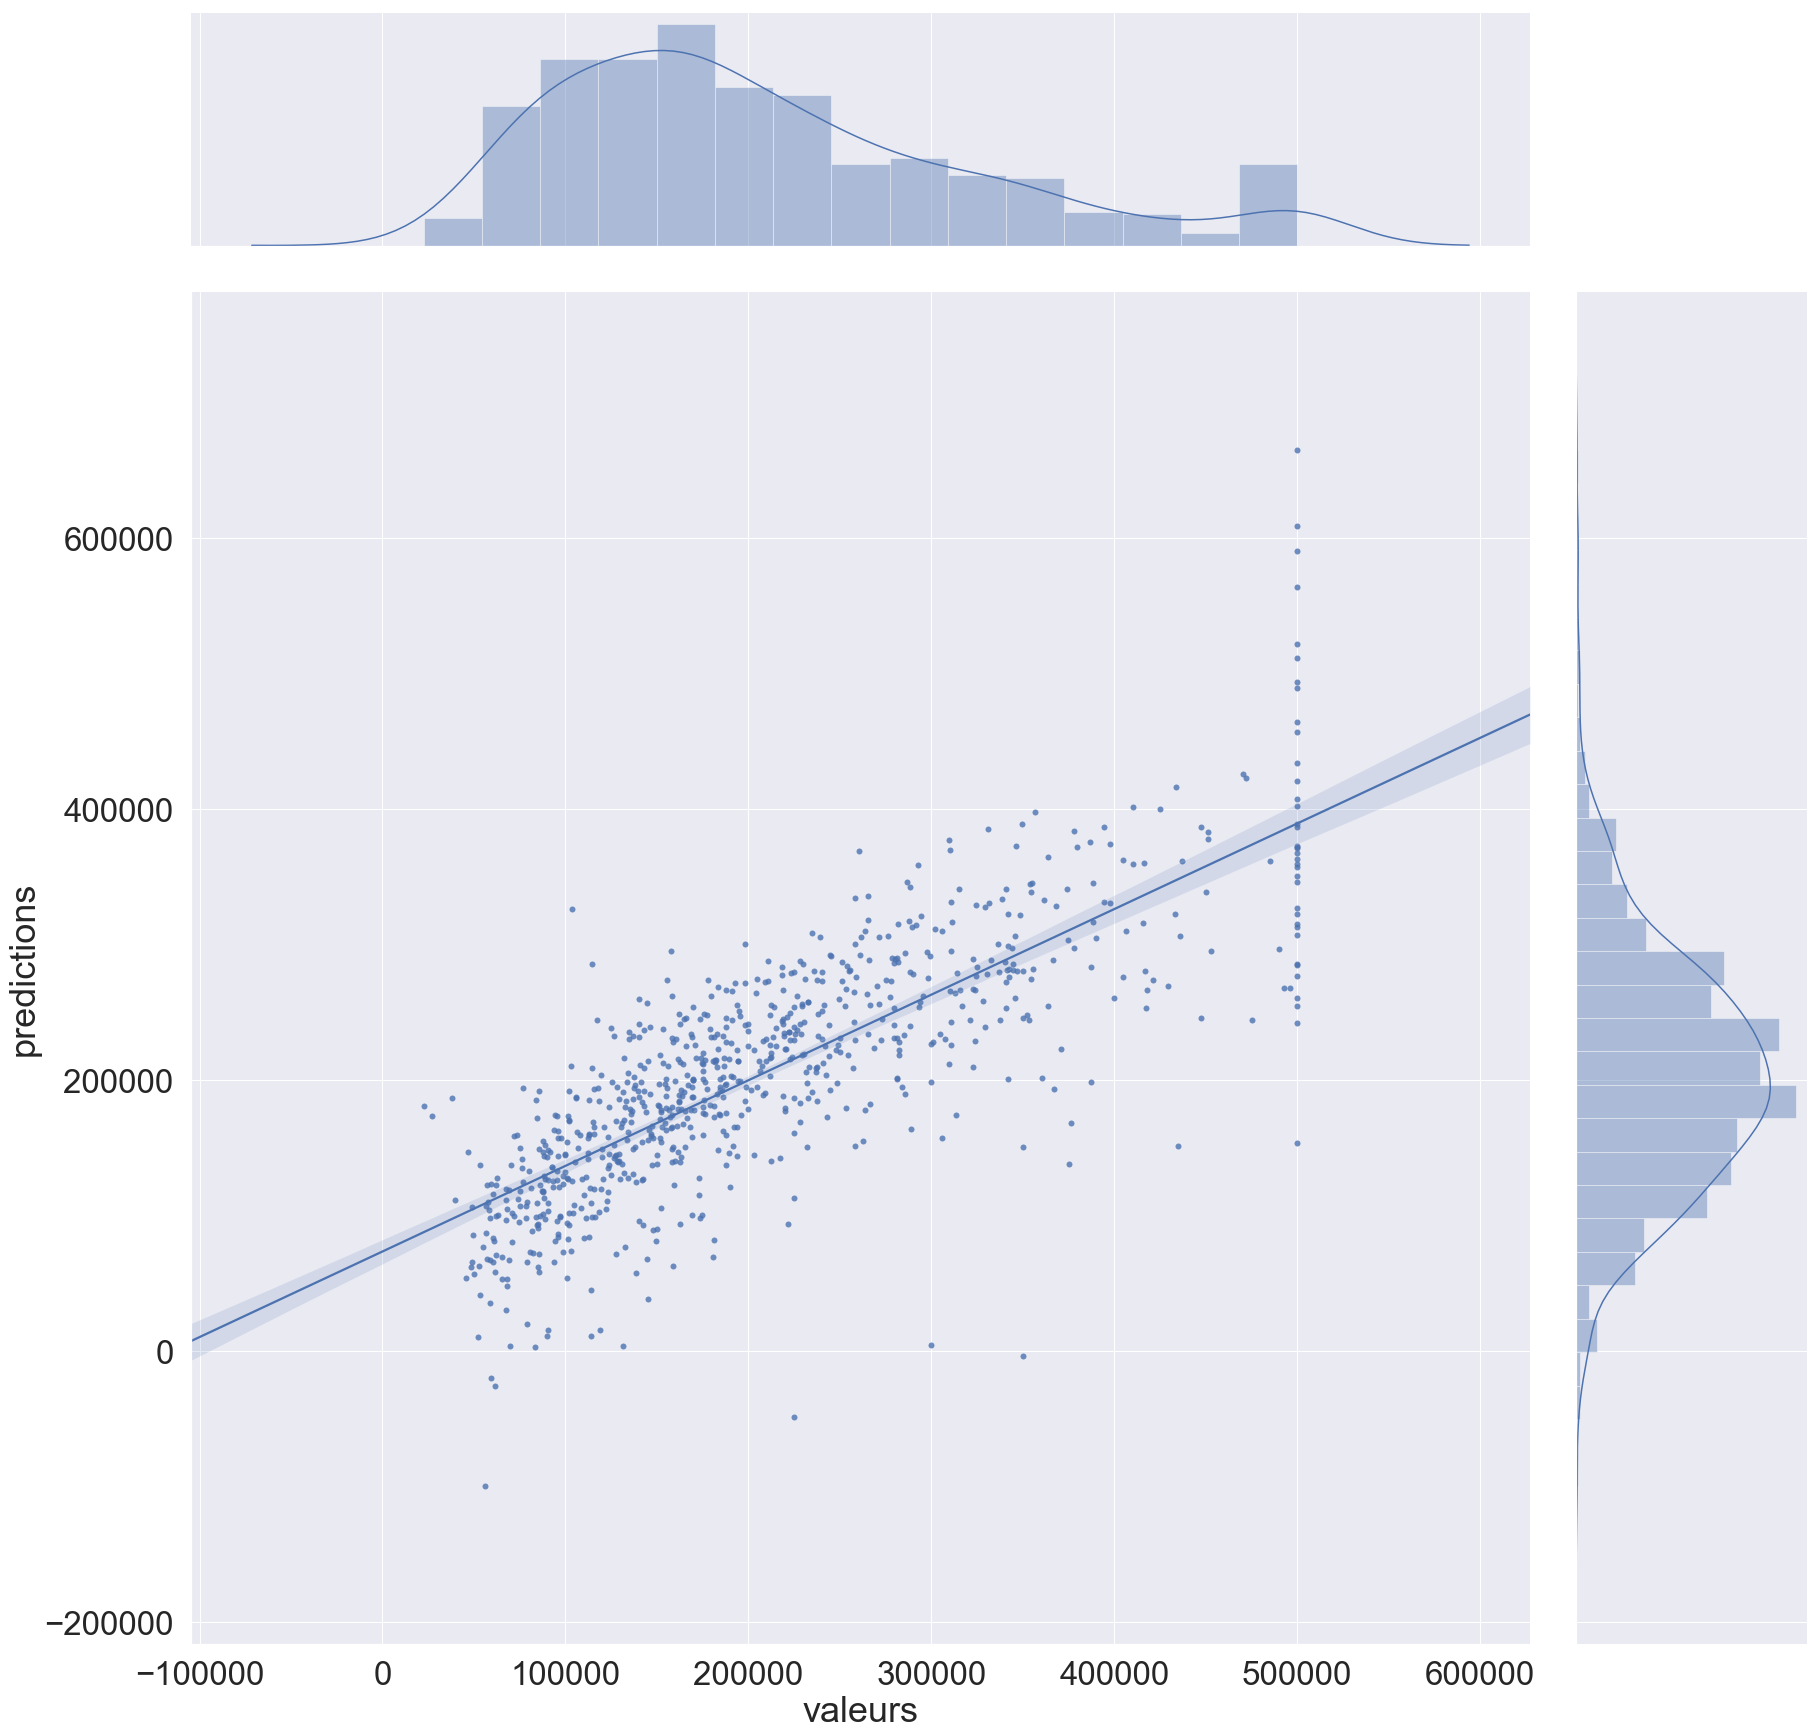

In [38]:
affichageMetricsSansLog(yRegressions.Observations, yRegressions.BayesianRidge)

Mean absolute error                 MAE   : 107550.084674
Median absolute error               MedAE : 104434.675301
Mean squared error                  MSE   : 15419542860.173841
Root mean squared error             RMSE  : 124175.451923
R² score  raw_values                R²    : -0.147721
R² score  uniform_average           R²    : -0.147721
R² score  variance_weighted         R²    : -0.147721
R  score  raw_values                R     : 0.384345
R  score  uniform_average           R     : 0.384345
R  score  variance_weighted         R     : 0.384345


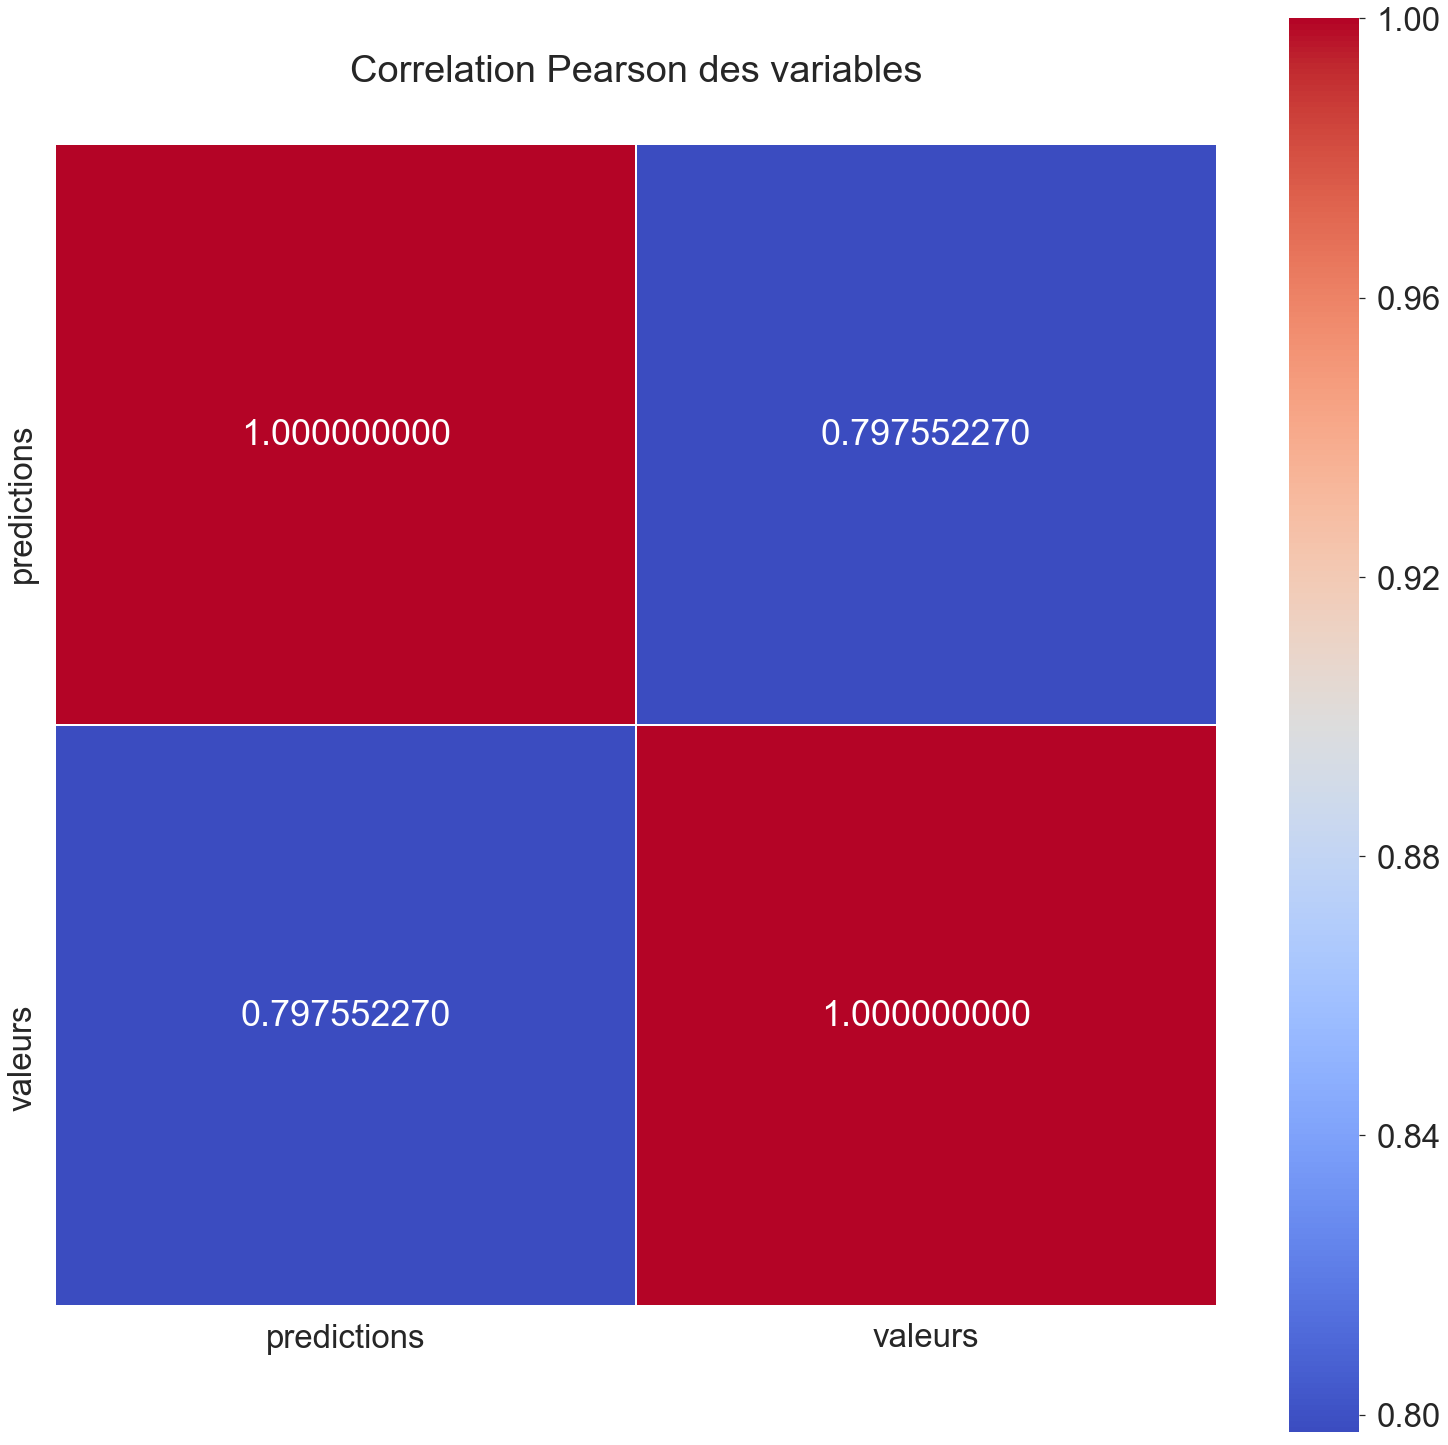

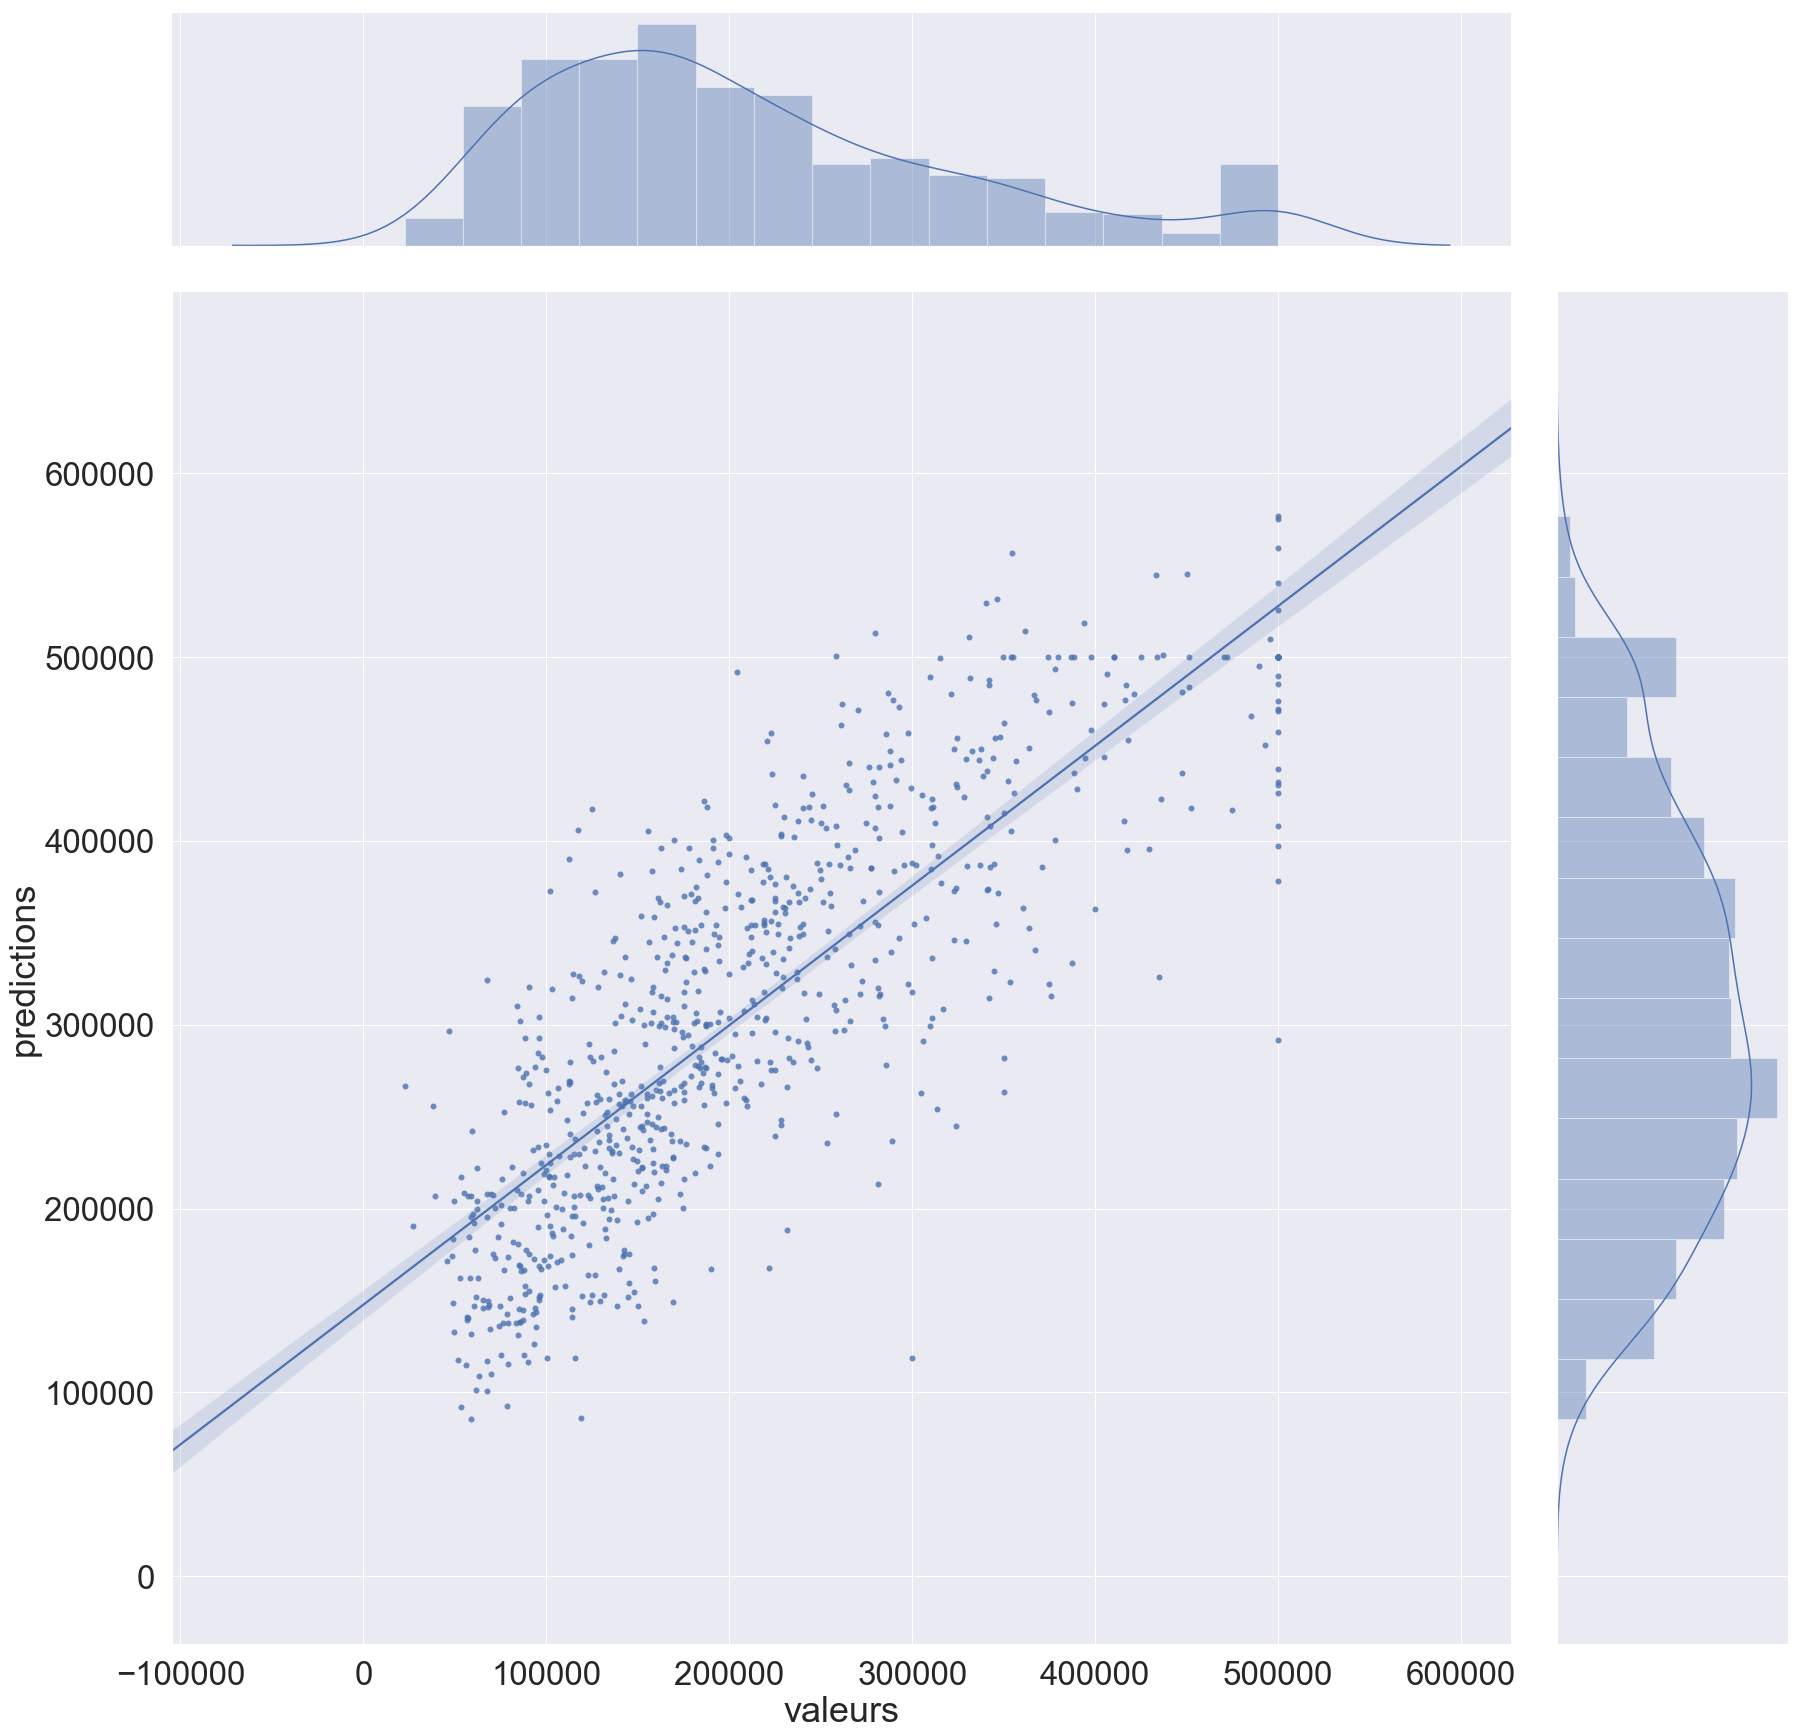

In [39]:
affichageMetricsSansLog(yRegressions.Observations, yRegressions.GradientBoostingRegressor)

In [40]:
from sklearn.preprocessing import StandardScaler
donnees[['longitude','latitude','housing_median_age',
   'total_rooms','total_bedrooms','population',
   'households','median_income']] = \
    StandardScaler().fit_transform(donnees[['longitude','latitude','housing_median_age',
   'total_rooms','total_bedrooms','population',
   'households','median_income']])
donnees.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.970899,-0.974429,-0.977033,2.344766,452600.0,0
1,-1.322844,1.043185,-0.607019,2.045890,1.348763,0.861439,1.669961,2.332238,358500.0,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.826069,-0.820777,-0.843637,1.782699,352100.0,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719227,-0.766028,-0.733781,0.932968,341300.0,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612385,-0.759847,-0.629157,-0.012881,342200.0,0


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(donnees.drop(columns='median_house_value'), 
                 np.log(donnees.median_house_value), 
                 test_size=0.4, random_state=101)

In [42]:
resultats,yRegressions = calculRegressions(X_train, X_test, y_train, y_test)

Exécution  LinearRegression              : 0.02s  p = 0.795186091226
Exécution  PolynomialRegression2         : 0.06s  p = 0.713760503869
Exécution  BayesianRidge                 : 0.02s  p = 0.795200100547
Exécution  MLPRegressor                  : 17.91s  p = 0.876164131196
Exécution  SVR_linear                    : 5.44s  p = 0.790403328173
Exécution  SVR_rbf                       : 12.59s  p = 0.816284964732
Exécution  RandomForestRegressor         : 15.43s  p = 0.805447504431
Exécution  GradientBoostingRegressor     : 5.47s  p = 0.806147841847


In [43]:
resultats.sort_values('RMSE')

,RMSE,R,Pearson
MLPRegressor,0.276302,0.875078,0.876164
SVR_rbf,0.331429,0.814229,0.816285
RandomForestRegressor,0.338523,0.805225,0.805448
BayesianRidge,0.346457,0.794804,0.795200
LinearRegression,0.346474,0.794781,0.795186
SVR_linear,0.349966,0.790073,0.790403
PolynomialRegression2,0.438761,0.639789,0.713761
GradientBoostingRegressor,0.595677,0.297835,0.806148


In [44]:
yRegressions.head()

,Observations,LinearRegression,PolynomialRegression2,BayesianRidge,MLPRegressor,SVR_linear,SVR_rbf,RandomForestRegressor,GradientBoostingRegressor
16086,12.914601,12.522757,12.725255,12.522309,12.829819,12.460008,12.646923,12.590469,13.156053
8816,13.122365,13.517866,13.238528,13.517753,13.149767,13.569137,13.279082,13.019903,13.122365
7175,11.719126,11.856439,11.758693,11.856575,11.718939,11.879807,11.798225,11.941556,12.282337
16714,12.250568,12.435368,12.405921,12.434814,12.109880,12.304099,12.432216,12.432483,12.631978
14491,13.122365,13.162991,13.054025,13.162888,12.961927,13.185205,13.042140,13.016591,13.122365


Mean absolute error                 MAE   : 0.500000
Median absolute error               MedAE : 0.465360
Mean squared error                  MSE   : 0.354831
Root mean squared error             RMSE  : 0.595677
R² score  raw_values                R²    : -0.088706
R² score  uniform_average           R²    : -0.088706
R² score  variance_weighted         R²    : -0.088706
R  score  raw_values                R     : 0.297835
R  score  uniform_average           R     : 0.297835
R  score  variance_weighted         R     : 0.297835


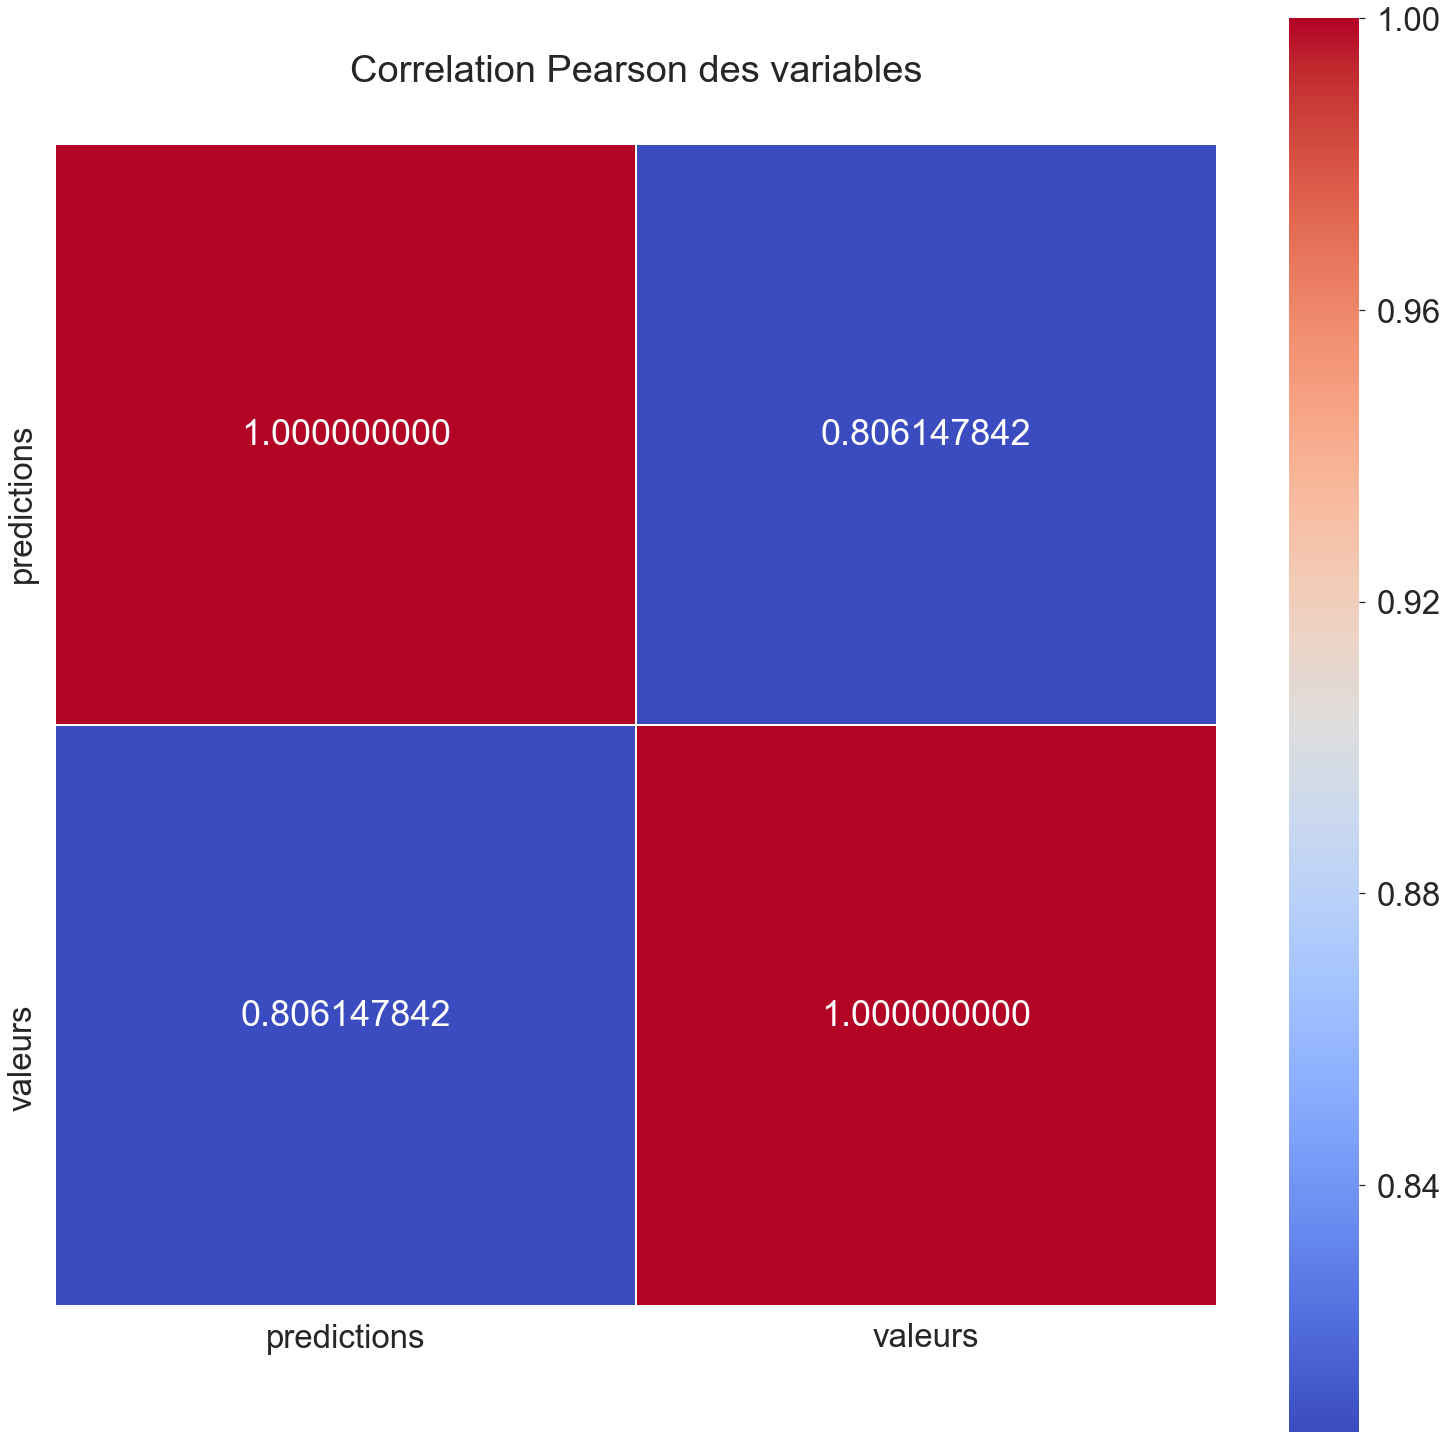

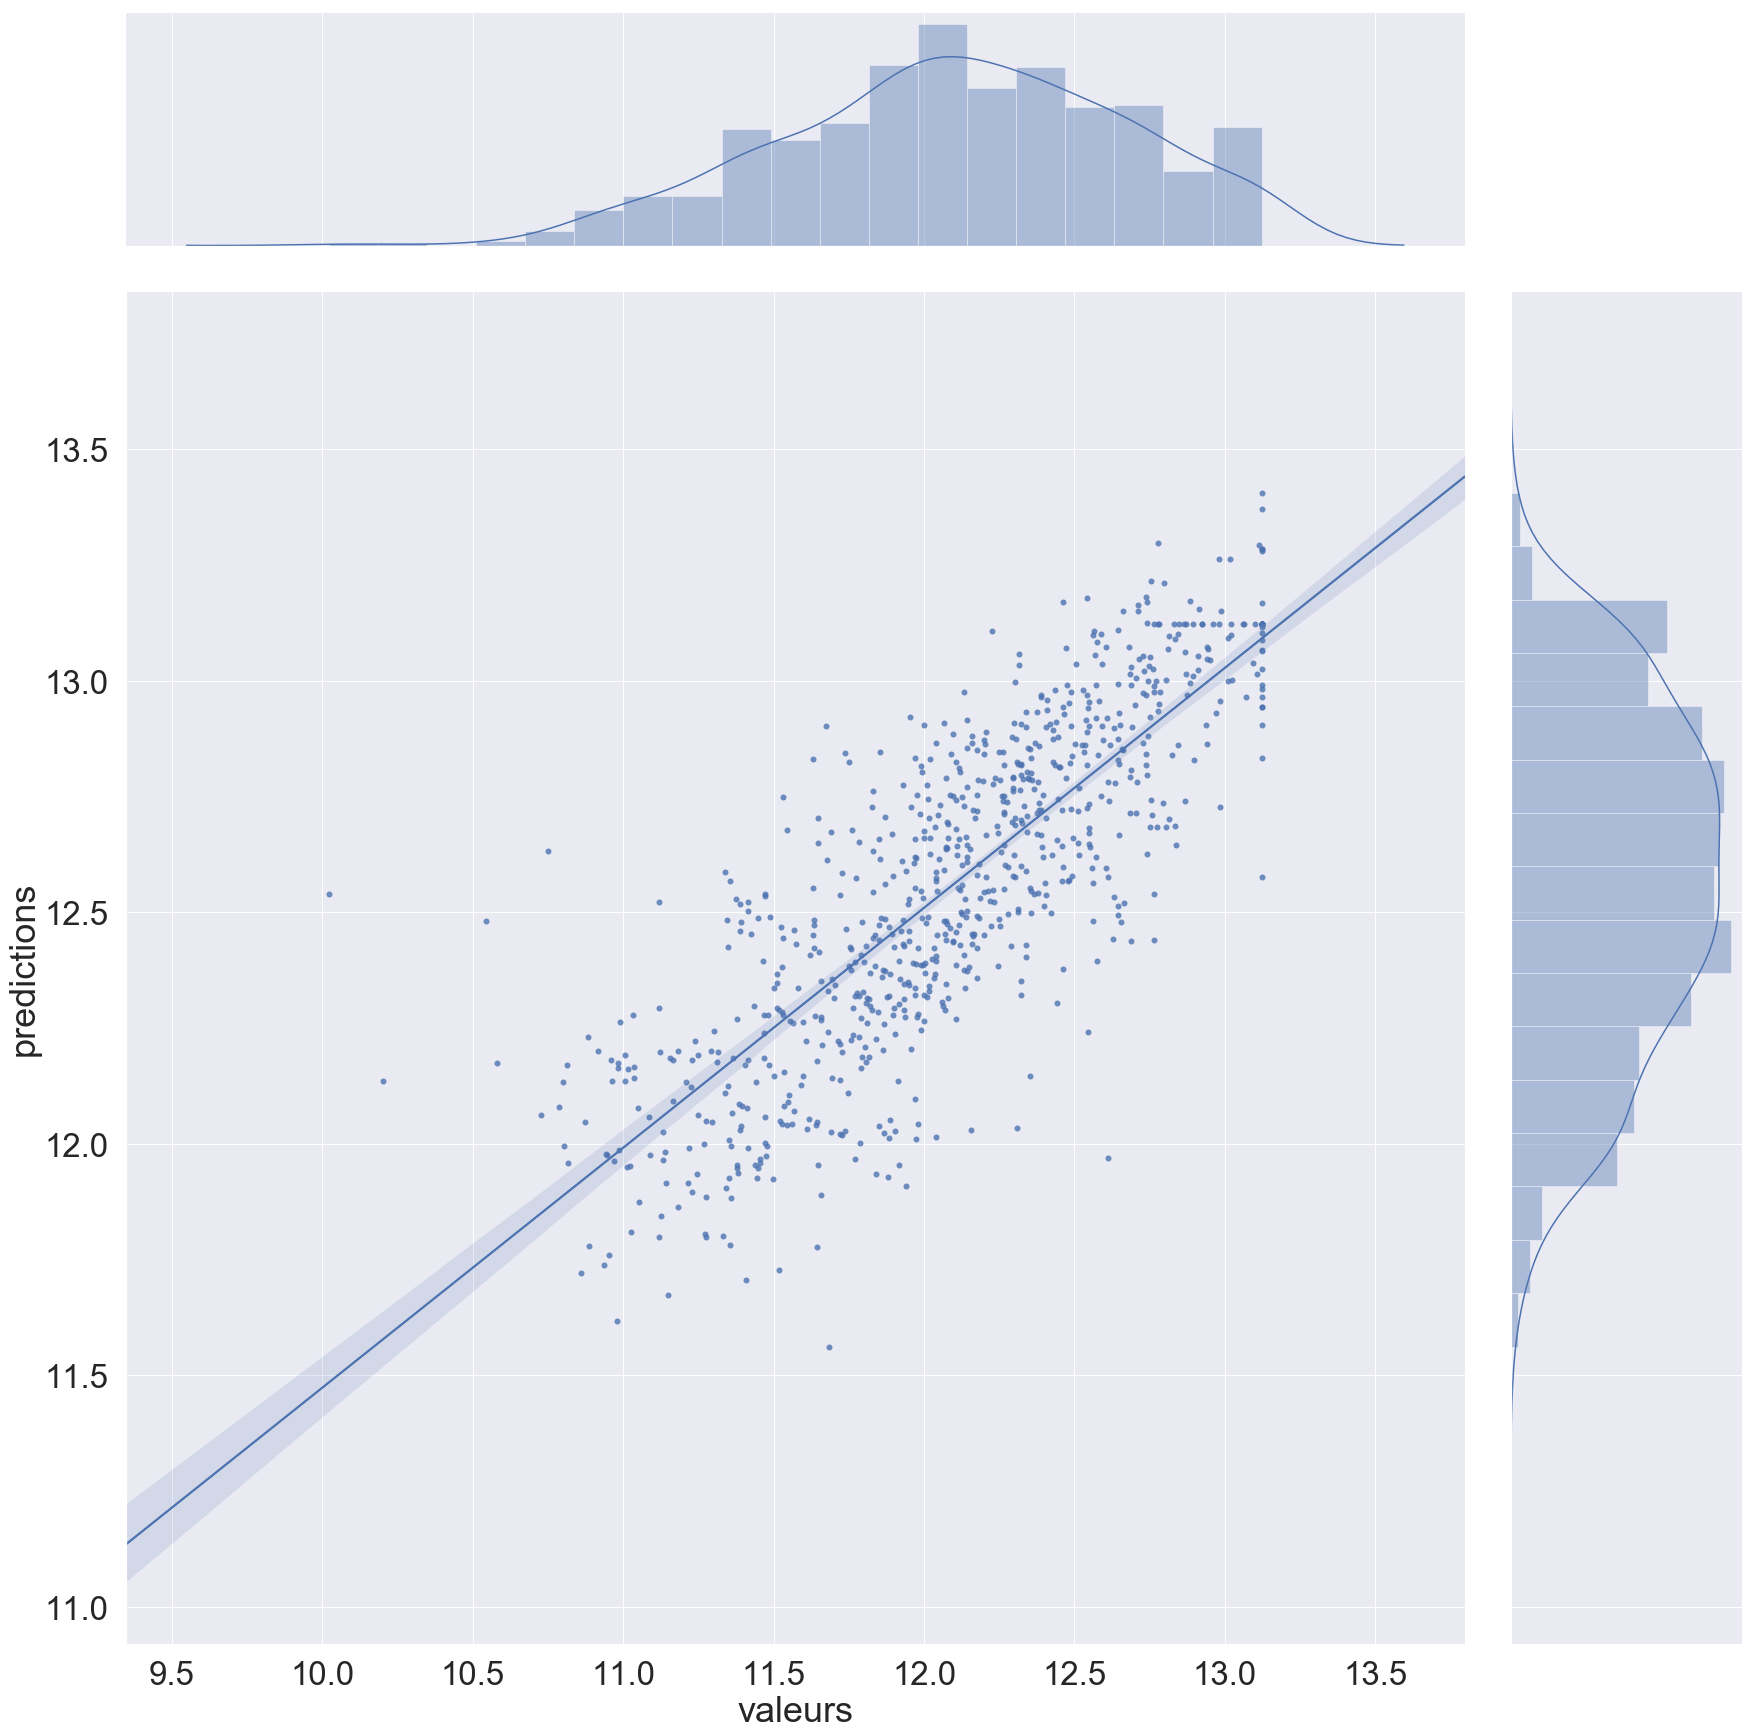

In [45]:
affichageMetricsSansLog(yRegressions.Observations, yRegressions.GradientBoostingRegressor)

Mean absolute error                 MAE   : 39475.607545
Median absolute error               MedAE : 25279.015869
Mean squared error                  MSE   : 3567603527.918077
Root mean squared error             RMSE  : 59729.419283
R² score  raw_values                R²    : 0.734453
R² score  uniform_average           R²    : 0.734453
R² score  variance_weighted         R²    : 0.734453
R  score  raw_values                R     : 0.857002
R  score  uniform_average           R     : 0.857002
R  score  variance_weighted         R     : 0.857002


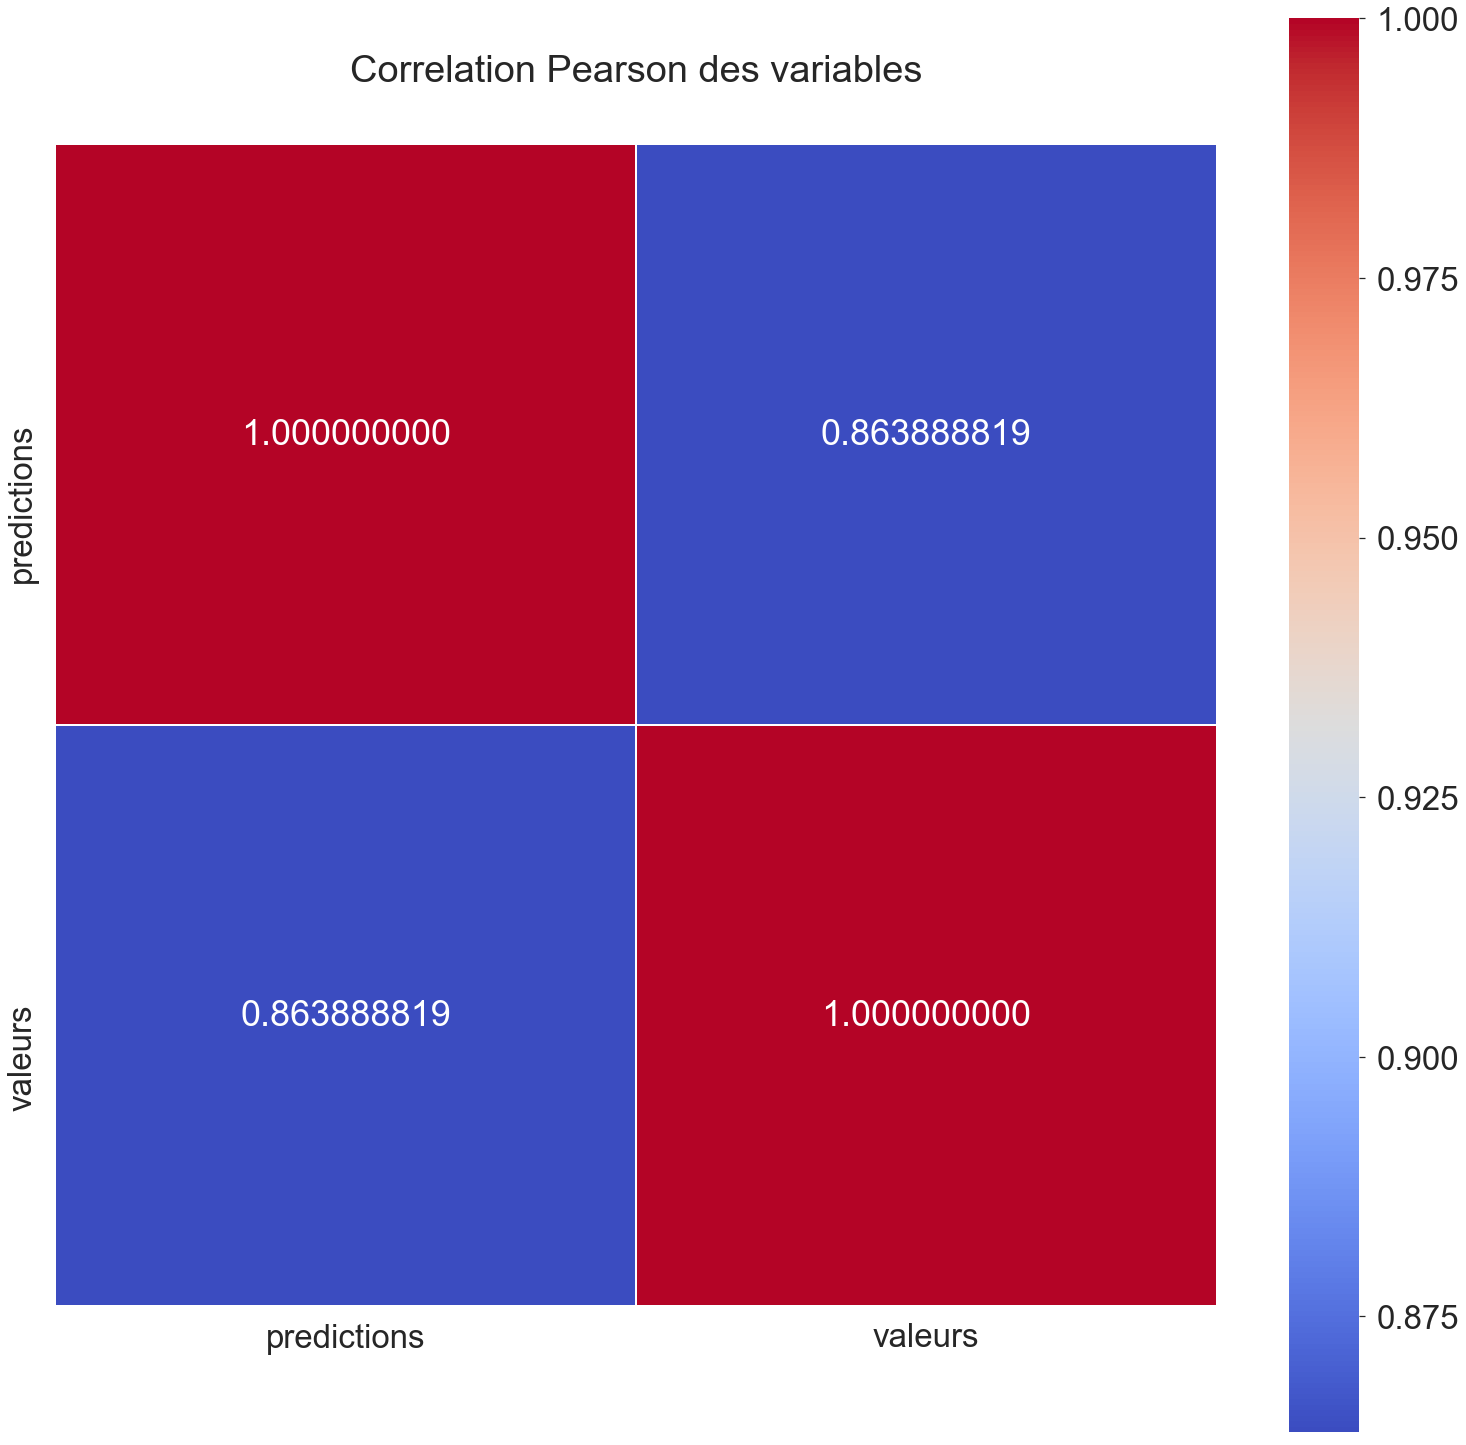

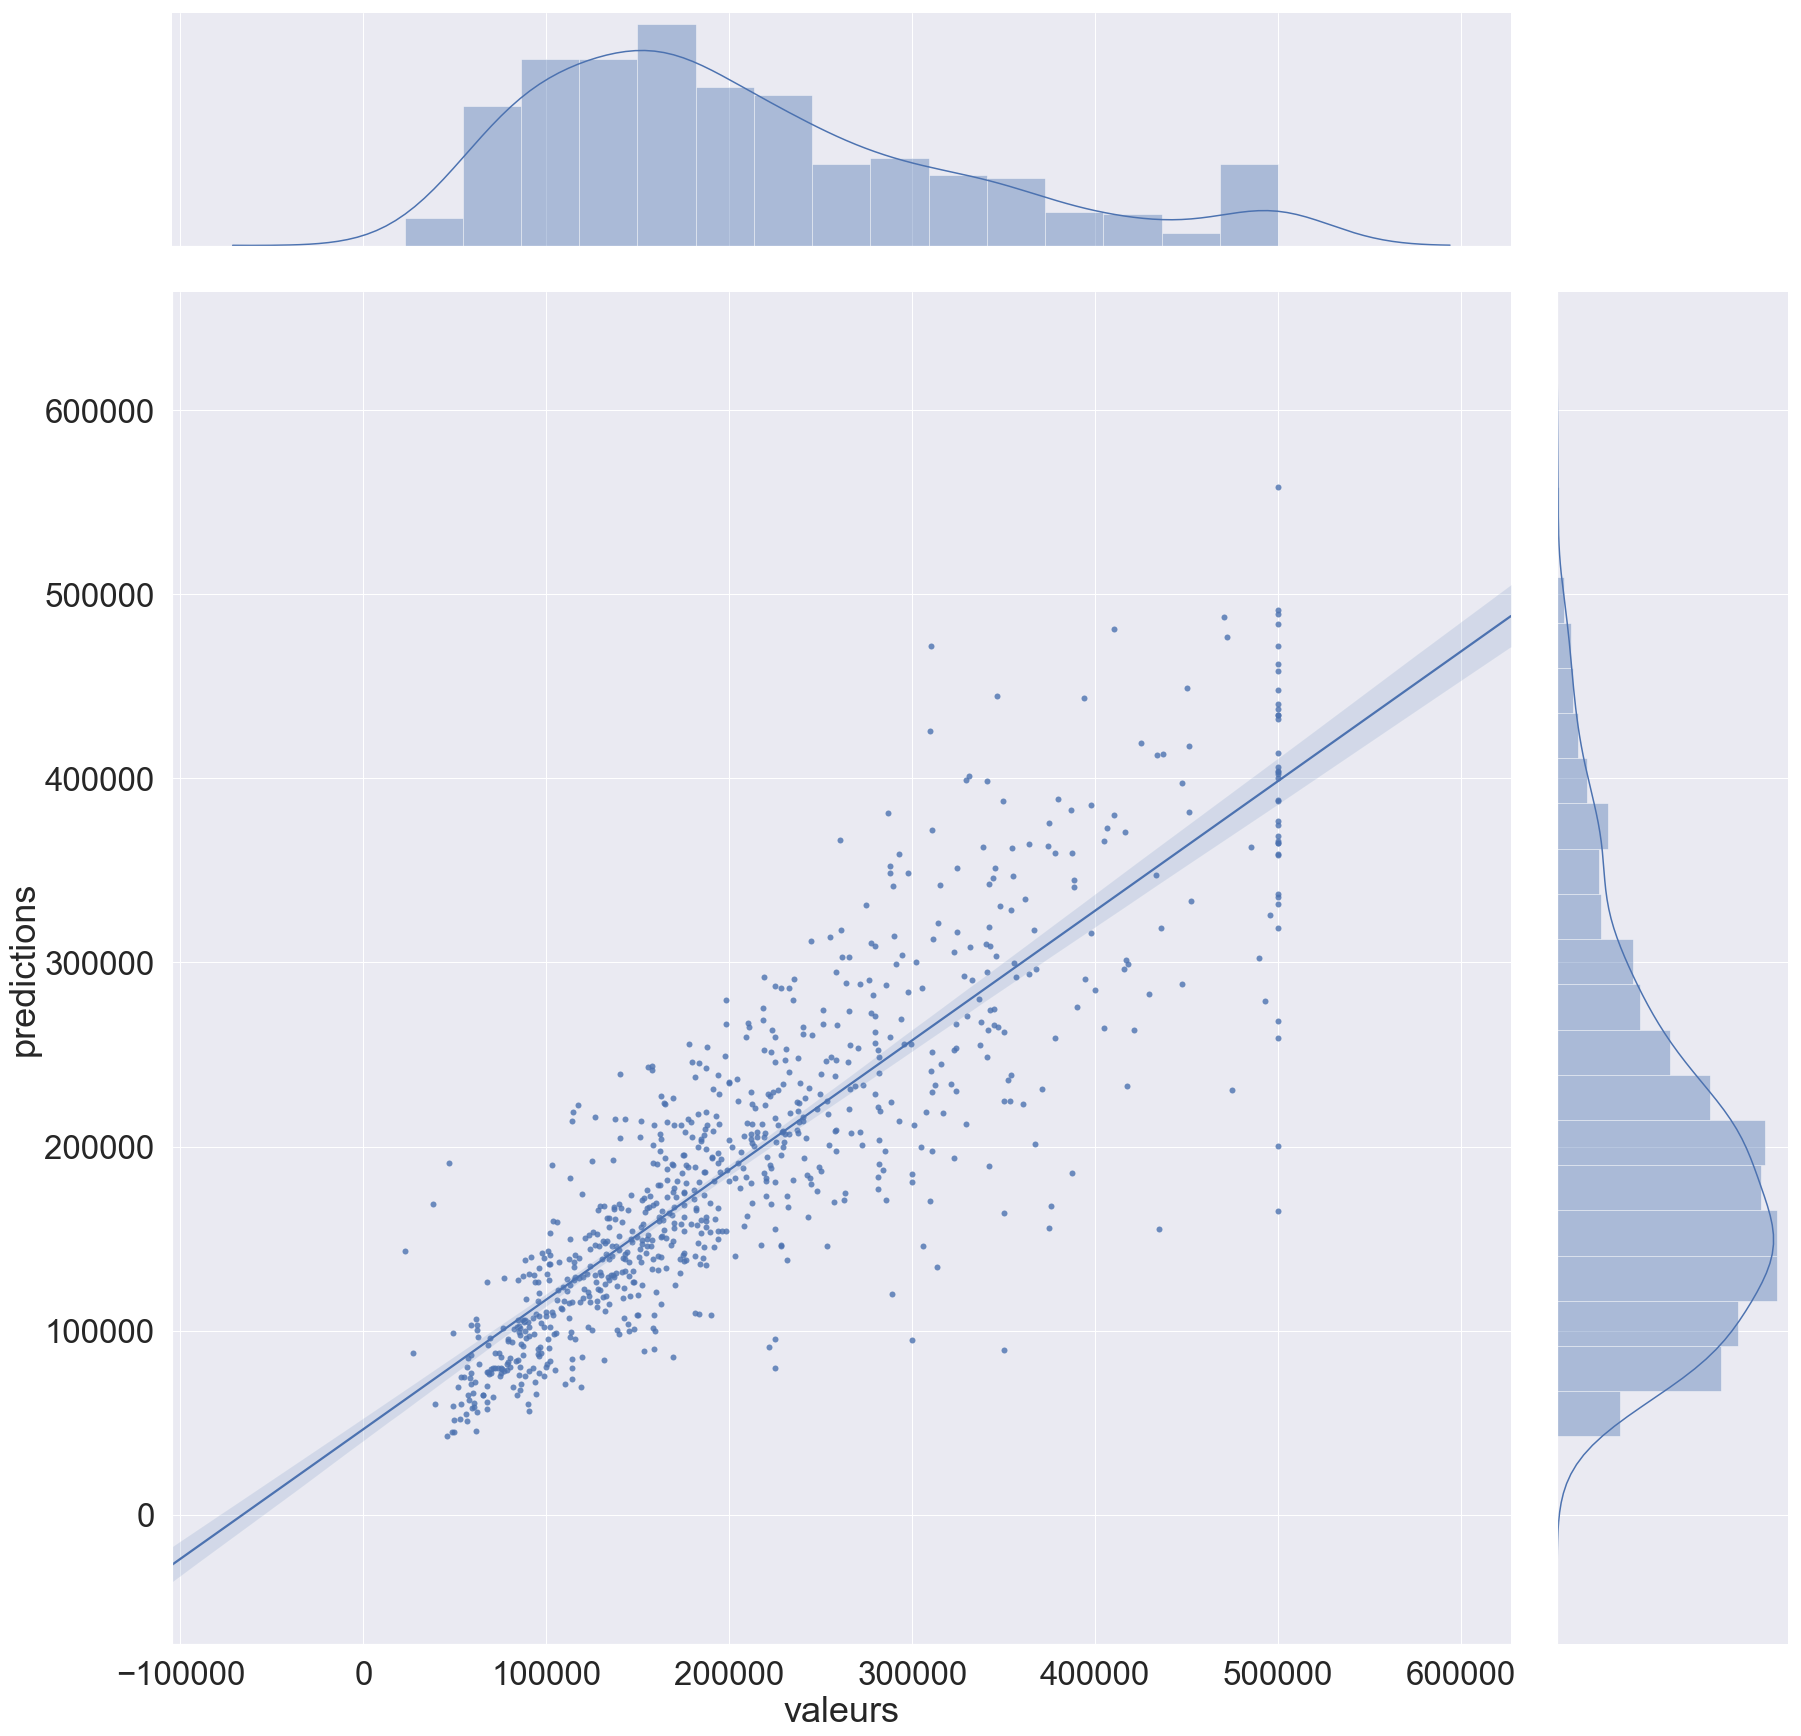

In [46]:
affichageMetricsSansLog(np.exp(yRegressions.Observations), 
                        np.exp(yRegressions.MLPRegressor))

In [47]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [48]:
resultats,yRegressions = calculRegressions(X_train.drop(columns=['longitude', 'latitude']),
                                           X_test.drop(columns=['longitude', 'latitude']),
                                           y_train, y_test)

Exécution  LinearRegression              : 0.03s  p = 0.725667237220
Exécution  PolynomialRegression2         : 0.06s  p = 0.688998423377
Exécution  BayesianRidge                 : 0.02s  p = 0.725672590284
Exécution  MLPRegressor                  : 23.11s  p = 0.843746581097
Exécution  SVR_linear                    : 5.22s  p = 0.723158373960
Exécution  SVR_rbf                       : 12.93s  p = 0.776154528559
Exécution  RandomForestRegressor         : 13.28s  p = 0.800510868694
Exécution  GradientBoostingRegressor     : 5.11s  p = 0.795675709599


In [49]:
resultats

,RMSE,R,Pearson
MLPRegressor,0.307317,0.842748,0.843747
RandomForestRegressor,0.342290,0.800323,0.800511
GradientBoostingRegressor,0.623507,0.439100,0.795676
SVR_rbf,0.360101,0.775973,0.776155
BayesianRidge,0.392816,0.725644,0.725673
LinearRegression,0.392820,0.725637,0.725667
SVR_linear,0.394316,0.723142,0.723158
PolynomialRegression2,0.436793,0.643908,0.688998


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                 donnees.drop(columns='median_house_value'), 
                 donnees.median_house_value, 
                 test_size=0.4, random_state=101)

In [50]:
X_train, y_train = X_train[donnees.median_house_value < 450000], \
                   y_train[donnees.median_house_value < 450000]

In [51]:
y_train = np.log(y_train)

In [52]:
y_test = np.log(y_test)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                 donnees[donnees.median_house_value < 450000].drop(columns='median_house_value'), 
                 np.log(donnees[donnees.median_house_value < 450000].median_house_value), 
                 test_size=0.4, random_state=101)

In [53]:
resultats,yRegressions = calculRegressions(X_train, X_test, y_train, y_test)

Exécution  LinearRegression              : 0.03s  p = 0.796261101227
Exécution  PolynomialRegression2         : 0.06s  p = 0.736166885775
Exécution  BayesianRidge                 : 0.02s  p = 0.796249007091
Exécution  MLPRegressor                  : 14.35s  p = 0.862312241282
Exécution  SVR_linear                    : 4.72s  p = 0.787336382646
Exécution  SVR_rbf                       : 11.27s  p = 0.811541997545
Exécution  RandomForestRegressor         : 14.61s  p = 0.794575053374
Exécution  GradientBoostingRegressor     : 5.51s  p = 0.867765244769


In [55]:
resultats.sort_values('RMSE')

,RMSE,R,Pearson
MLPRegressor,0.293182,0.858060,0.862312
SVR_rbf,0.336520,0.807797,0.811542
BayesianRidge,0.347174,0.793842,0.796249
LinearRegression,0.347180,0.793835,0.796261
RandomForestRegressor,0.350577,0.789240,0.794575
SVR_linear,0.352501,0.786607,0.787336
PolynomialRegression2,0.410851,0.694324,0.736167
GradientBoostingRegressor,0.436394,0.644737,0.867765


Mean absolute error                 MAE   : 43483.164603
Median absolute error               MedAE : 30476.846911
Mean squared error                  MSE   : 3902921218.908584
Root mean squared error             RMSE  : 62473.364075
R² score  raw_values                R²    : 0.709494
R² score  uniform_average           R²    : 0.709494
R² score  variance_weighted         R²    : 0.709494
R  score  raw_values                R     : 0.842315
R  score  uniform_average           R     : 0.842315
R  score  variance_weighted         R     : 0.842315


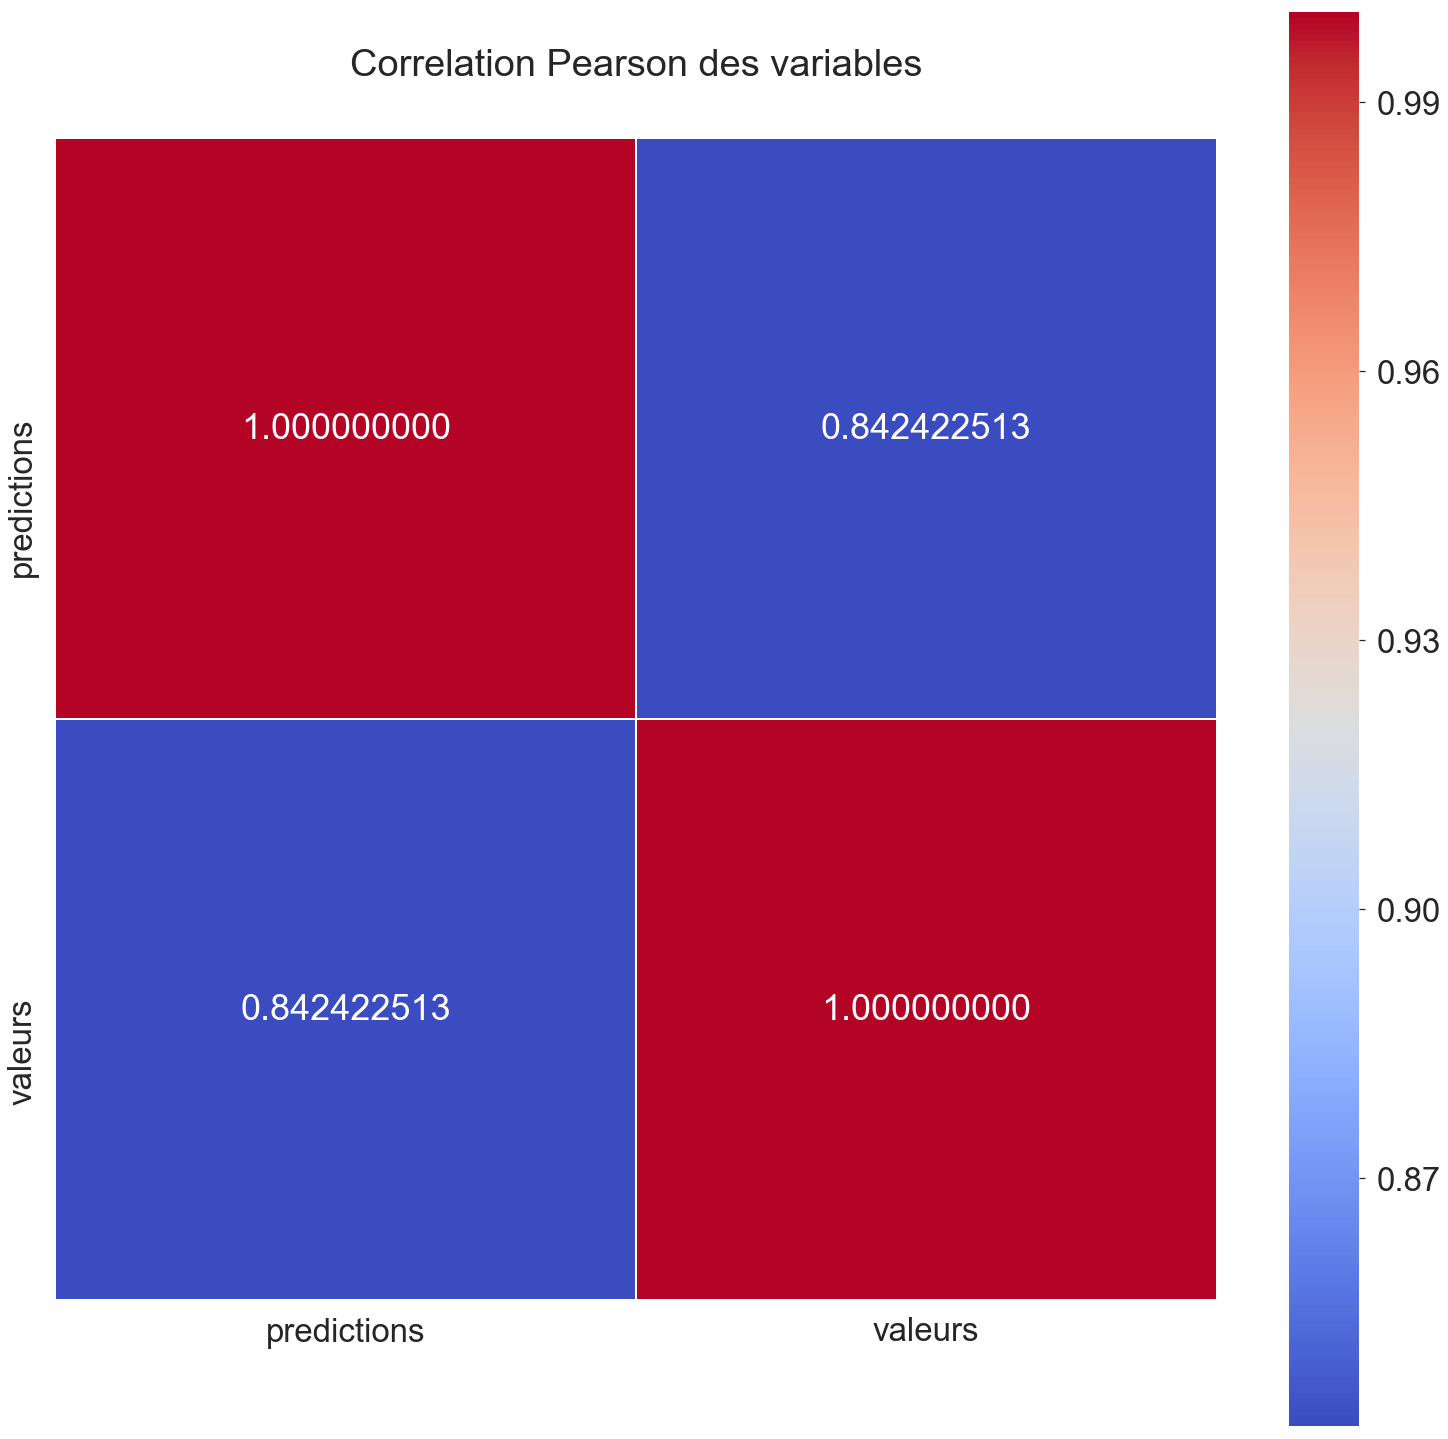

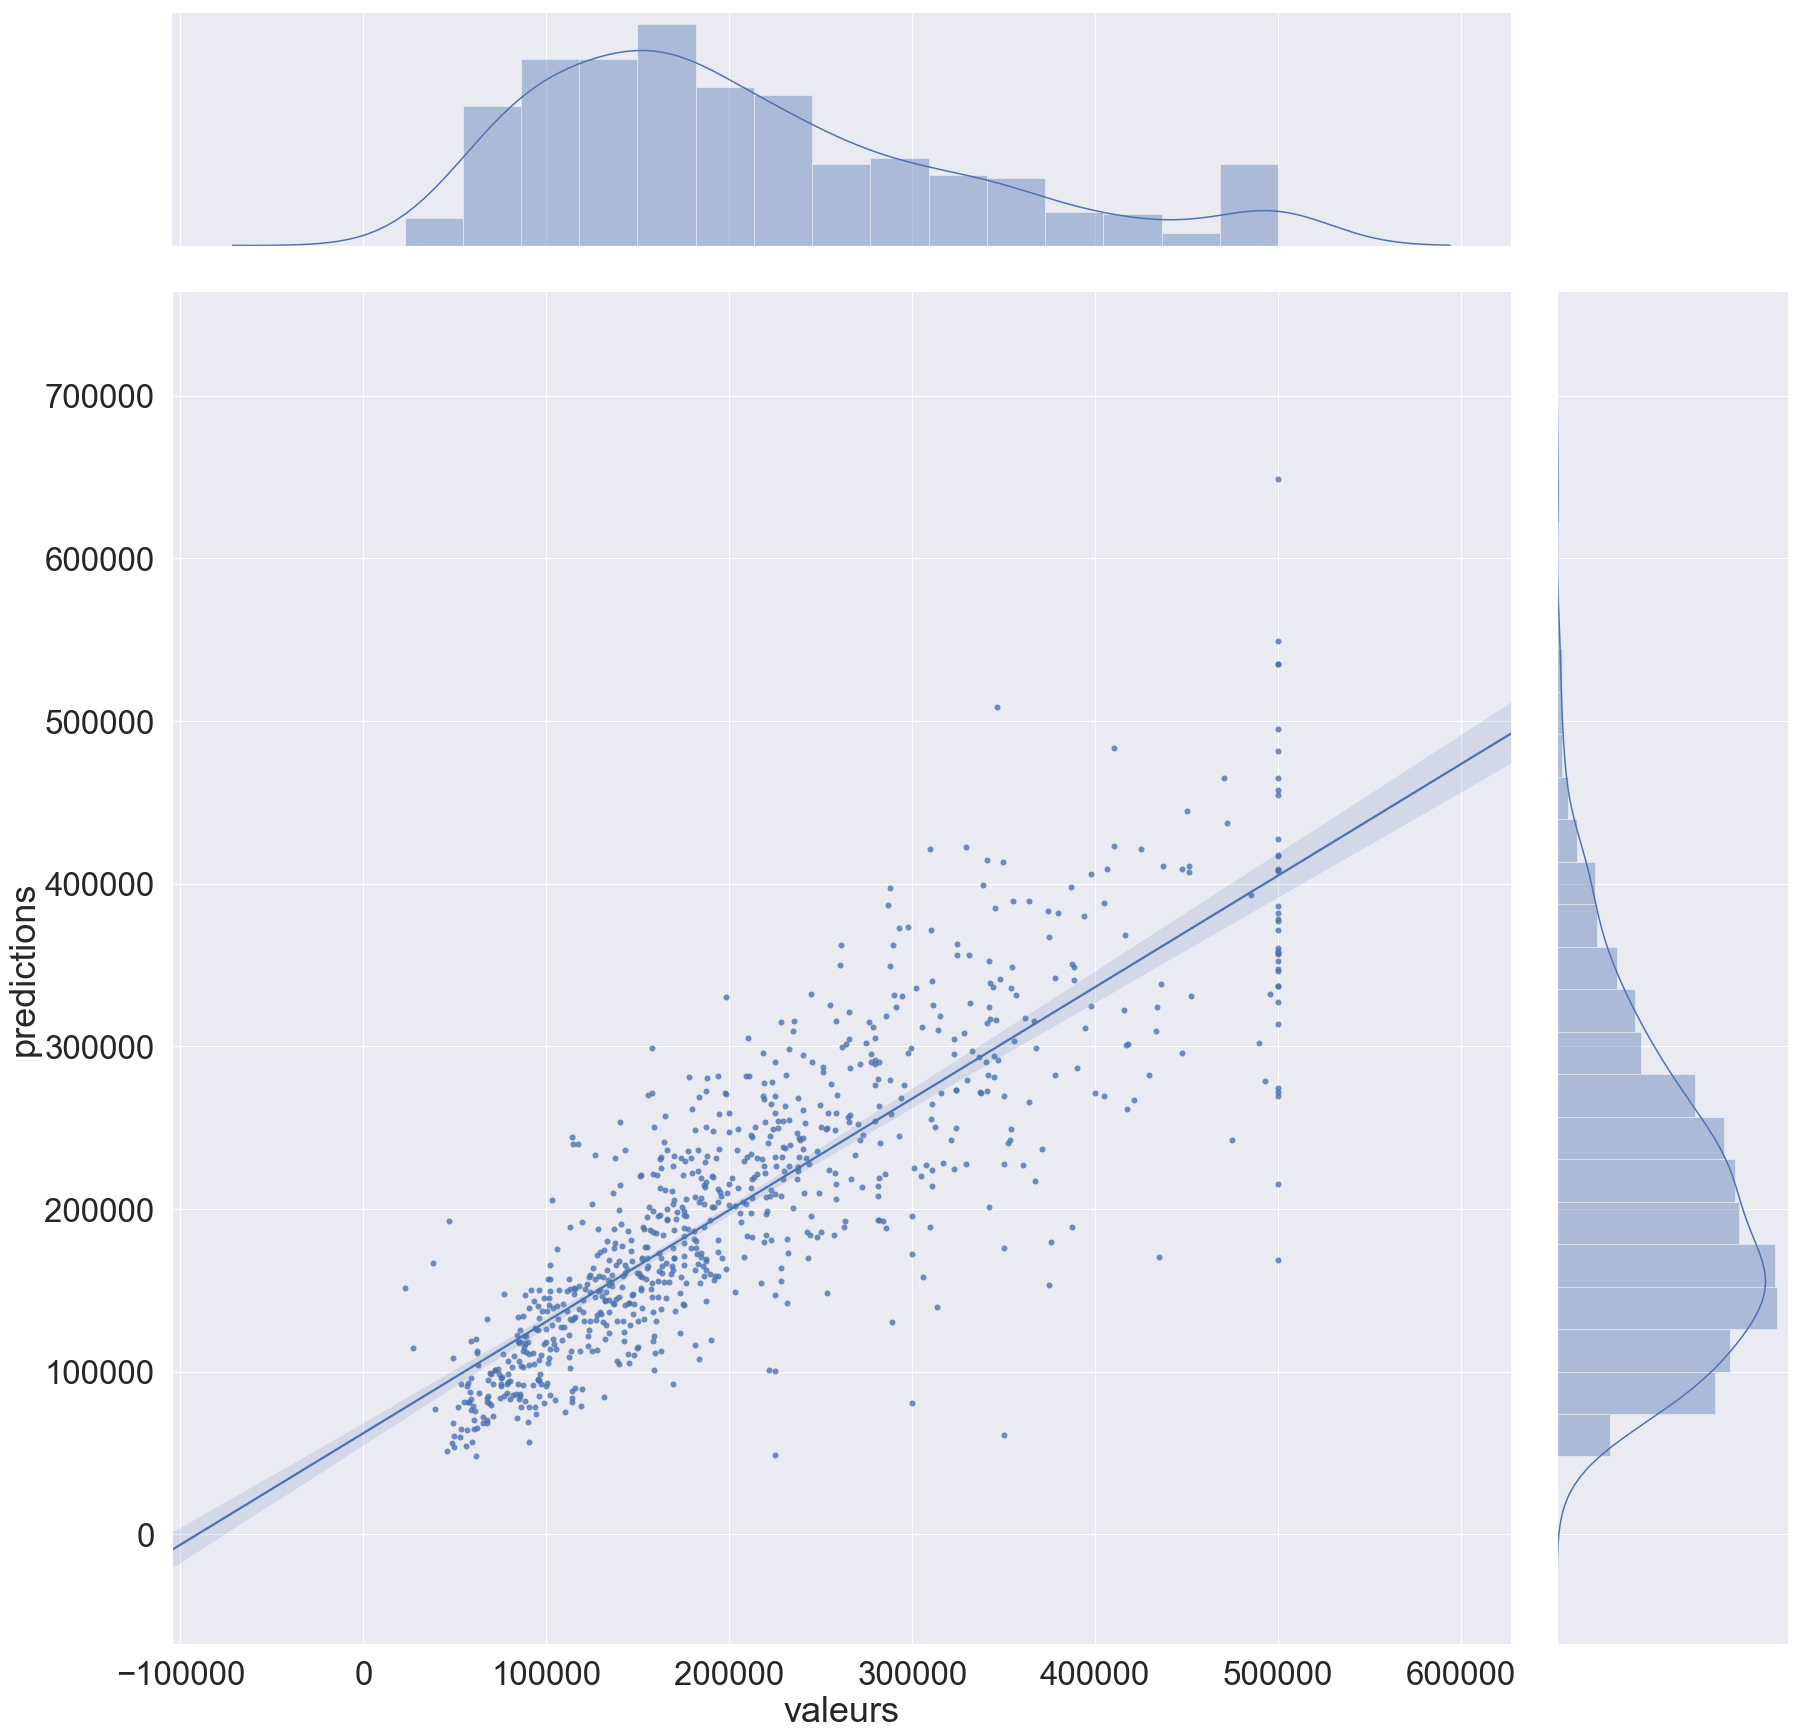

In [56]:
affichageMetricsSansLog(np.exp(yRegressions.Observations), 
                        np.exp(yRegressions.MLPRegressor))

In [111]:
def createColumnsQualitatives(donnees,col):
    for i in donnees[col].unique():
        nom = col+'_'+str(i)
        donnees[nom] = donnees[col].apply(lambda x : 1 if x==i else 0)
    donnees.drop(labels=col, axis=1, inplace=True)

In [112]:
from sklearn.model_selection import train_test_split
createColumnsQualitatives(donnees,'ocean_proximity')
X_train, X_test, y_train, y_test = train_test_split(donnees[donnees.median_house_value < 300000].drop(columns='median_house_value'), 
                 np.log(donnees[donnees.median_house_value < 300000].median_house_value), 
                 test_size=0.4, random_state=101)

In [113]:
resultats,yRegressions = calculRegressions(X_train, X_test, y_train, y_test)

Exécution  LinearRegression              : 0.02s  p = 0.779071404298
Exécution  PolynomialRegression2         : 0.05s  p = 0.634527086182
Exécution  BayesianRidge                 : 0.00s  p = 0.779080219450
Exécution  MLPRegressor                  : 0.97s  p = 0.782342931090
Exécution  SVR_linear                    : 2.01s  p = 0.778443259428
Exécution  SVR_rbf                       : 4.56s  p = 0.790225574139
Exécution  RandomForestRegressor         : 6.43s  p = 0.785630118852
Exécution  GradientBoostingRegressor     : 2.43s  p = 0.837501090817


In [114]:
resultats

,RMSE,R,Pearson
GradientBoostingRegressor,0.433146,0.297448,0.837501
SVR_rbf,0.278541,0.789338,0.790226
RandomForestRegressor,0.280802,0.785437,0.785630
MLPRegressor,0.282672,0.782170,0.782343
BayesianRidge,0.284494,0.778955,0.779080
LinearRegression,0.284504,0.778937,0.779071
SVR_linear,0.285193,0.777712,0.778443
PolynomialRegression2,0.398034,0.479863,0.634527


Mean absolute error                 MAE   : 32763.877049
Median absolute error               MedAE : 26317.978521
Mean squared error                  MSE   : 1832996380.899647
Root mean squared error             RMSE  : 42813.506991
R² score  raw_values                R²    : 0.568266
R² score  uniform_average           R²    : 0.568266
R² score  variance_weighted         R²    : 0.568266
R  score  raw_values                R     : 0.753834
R  score  uniform_average           R     : 0.753834
R  score  variance_weighted         R     : 0.753834


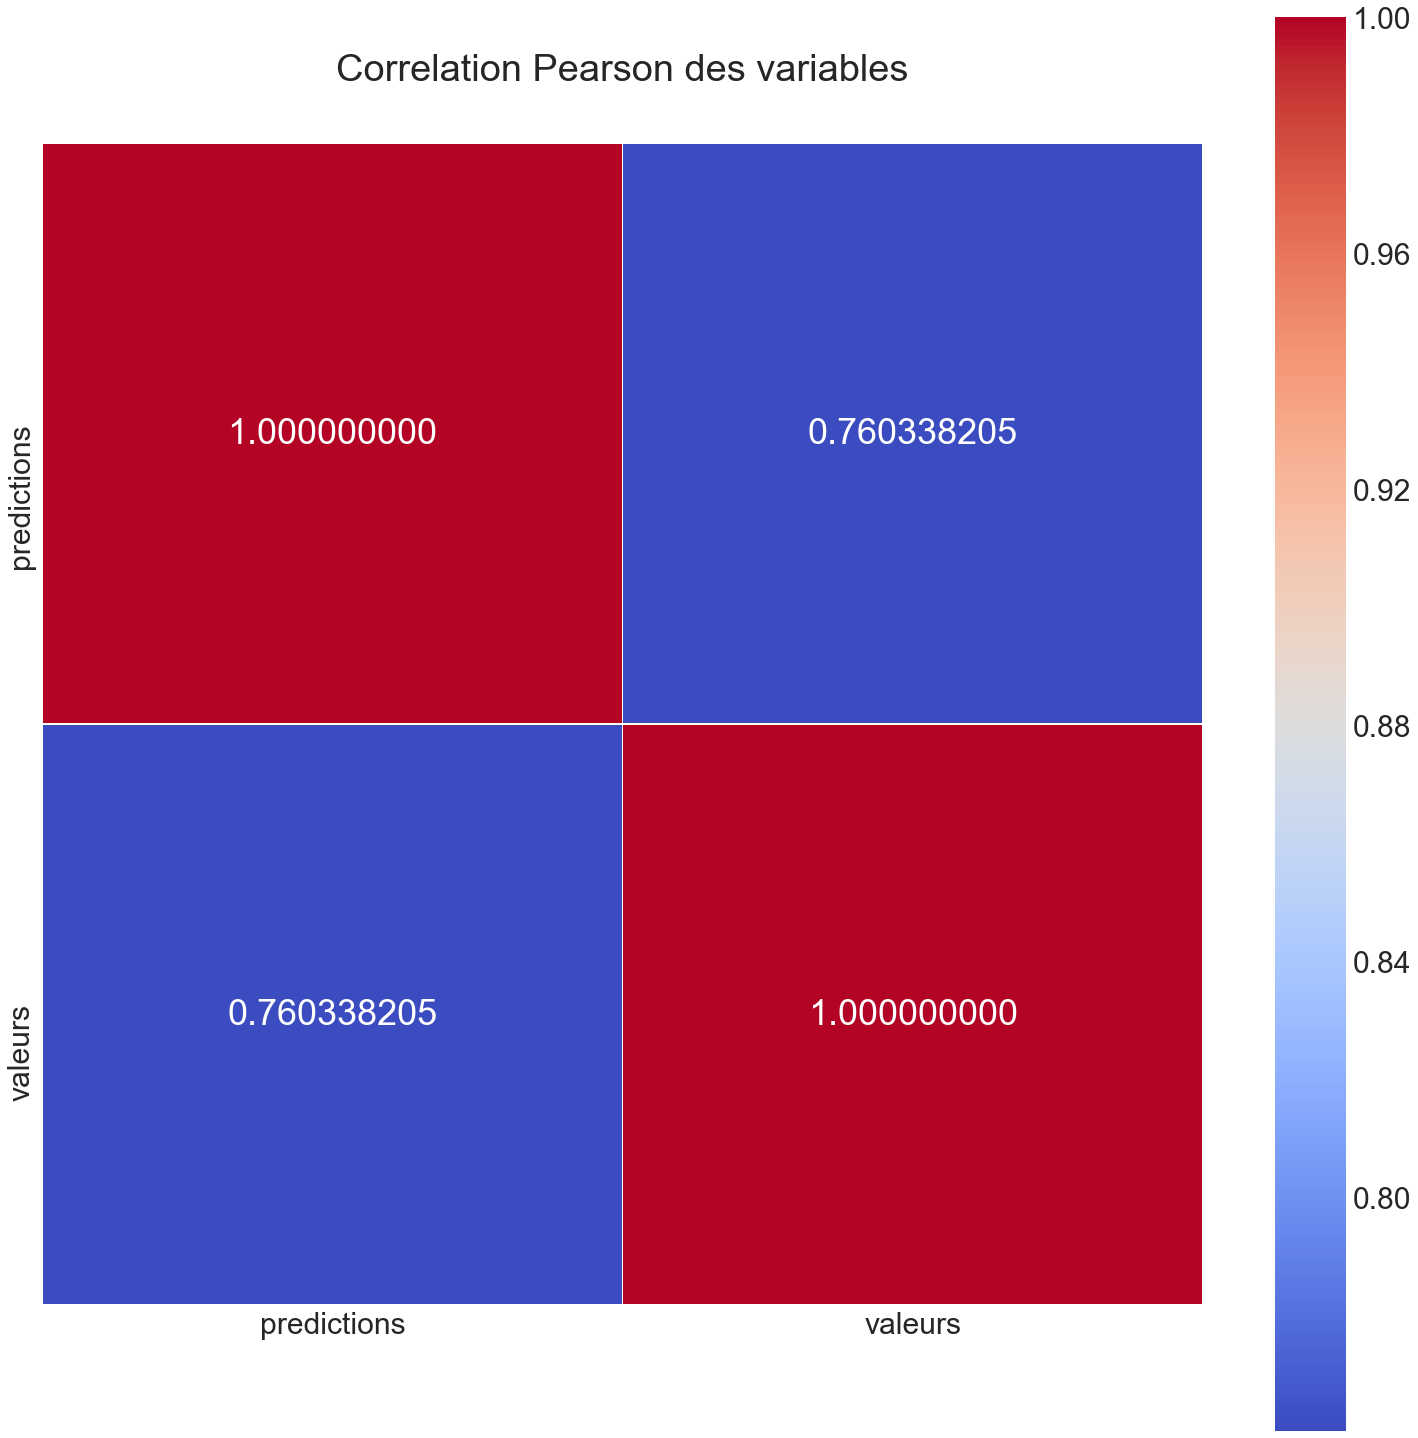

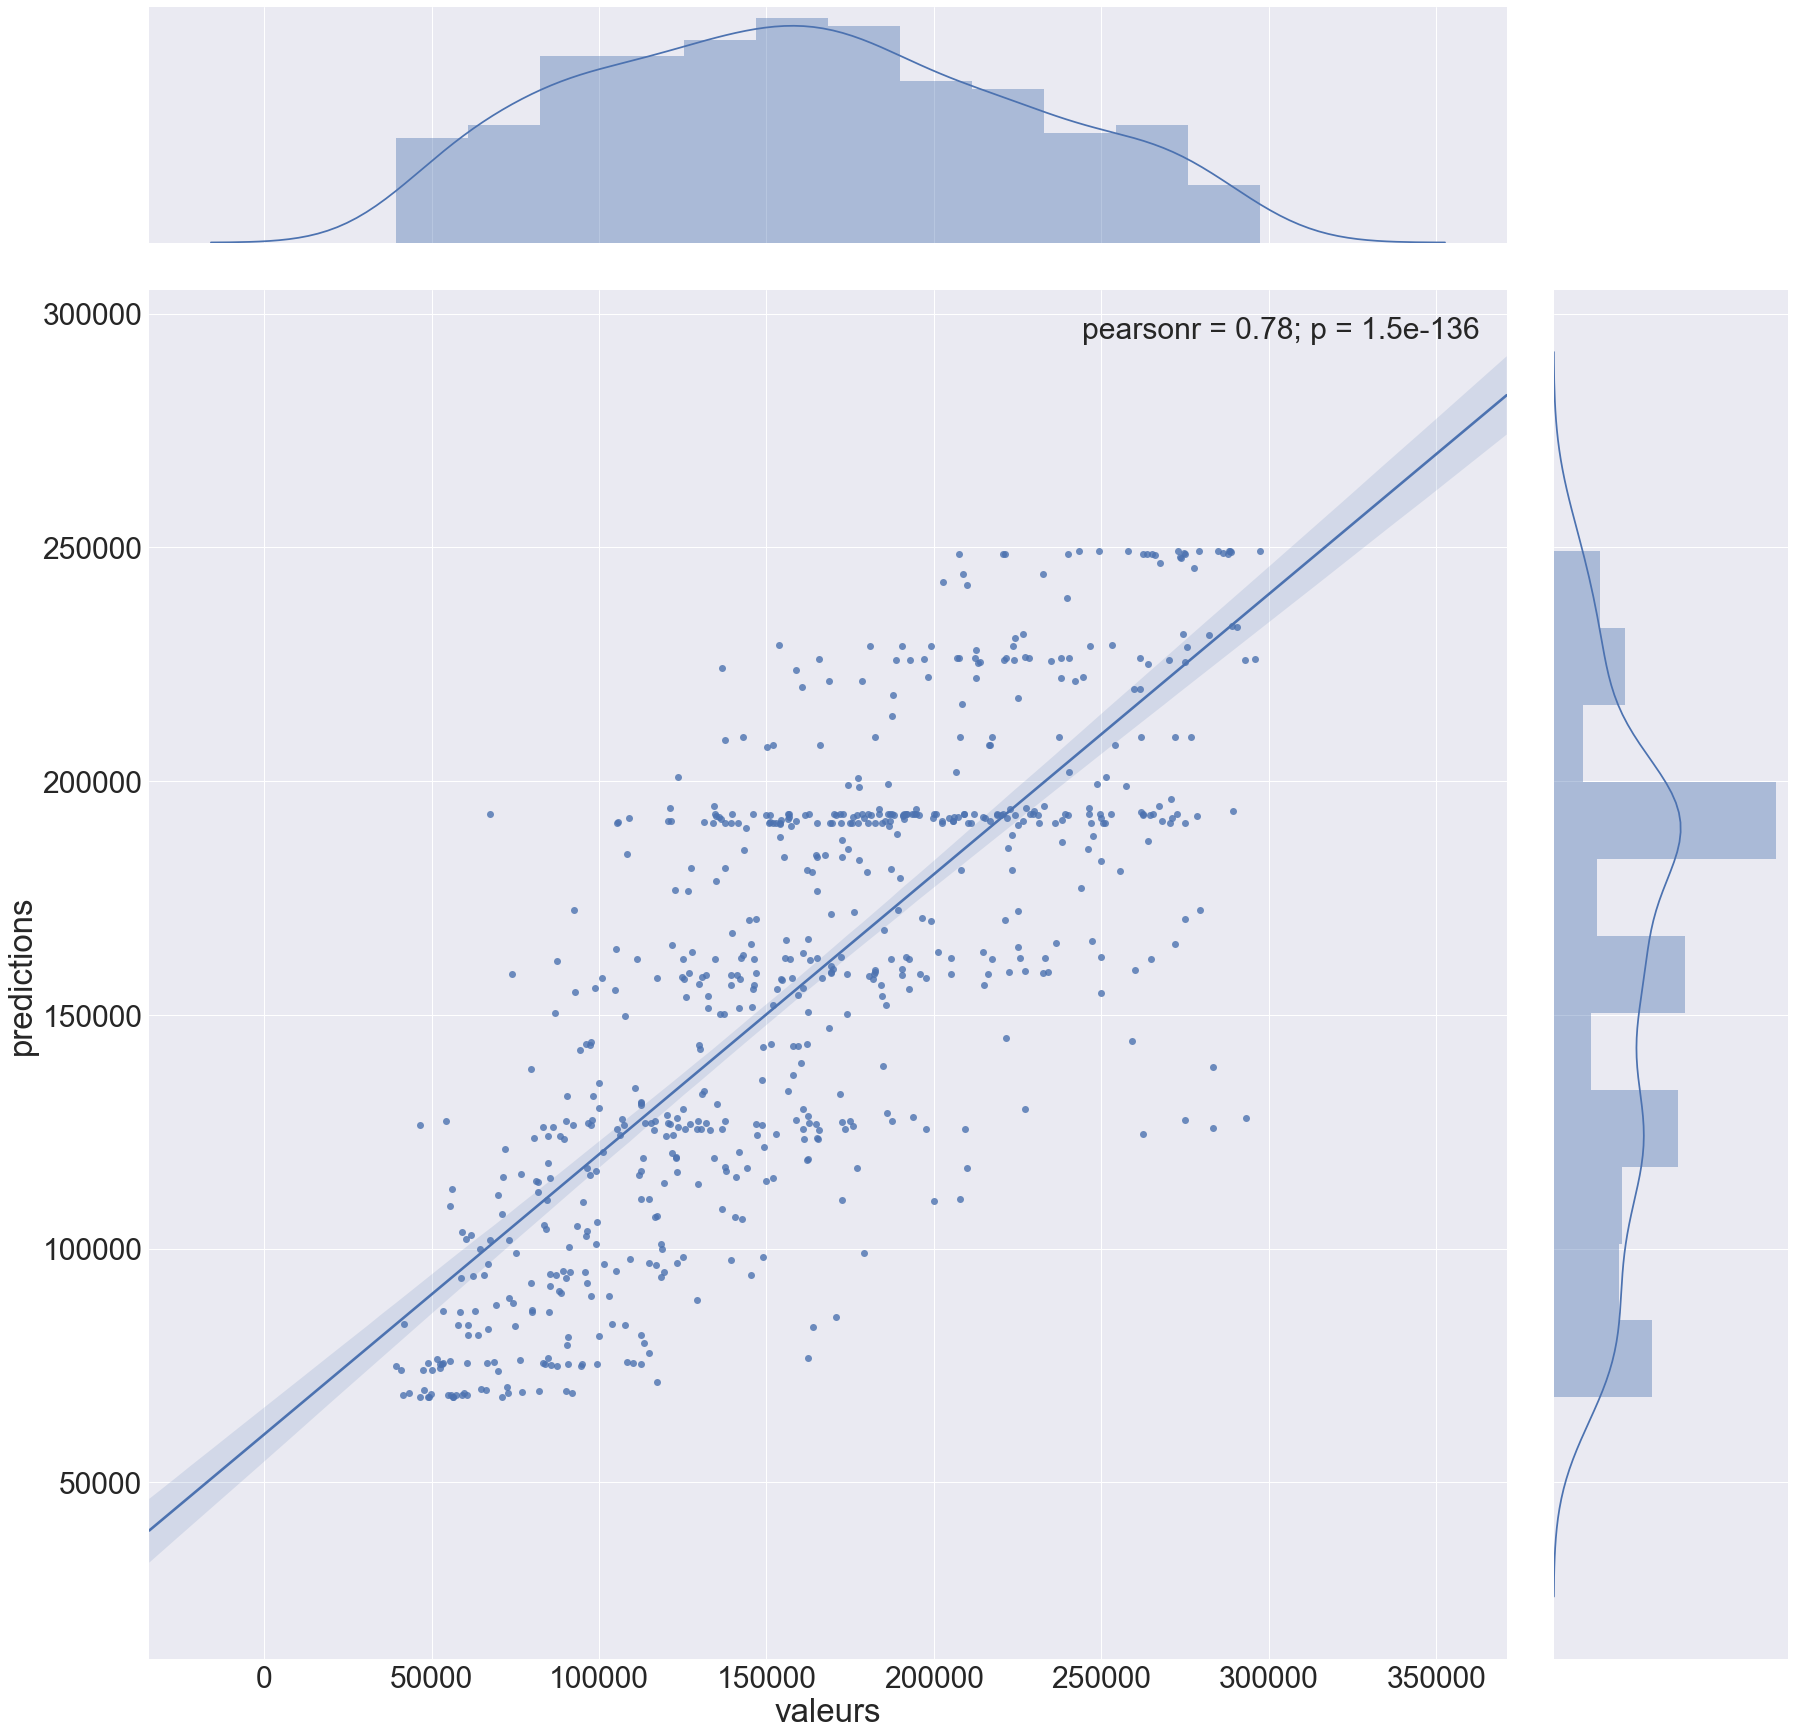

In [115]:
affichageMetricsSansLog(np.exp(yRegressions.Observations), 
                        np.exp(yRegressions.RandomForestRegressor))

Mean absolute error                 MAE   : 31648.550897
Median absolute error               MedAE : 24283.865940
Mean squared error                  MSE   : 1753703814.258059
Root mean squared error             RMSE  : 41877.246976
R² score  raw_values                R²    : 0.580979
R² score  uniform_average           R²    : 0.580979
R² score  variance_weighted         R²    : 0.580979
R  score  raw_values                R     : 0.762220
R  score  uniform_average           R     : 0.762220
R  score  variance_weighted         R     : 0.762220


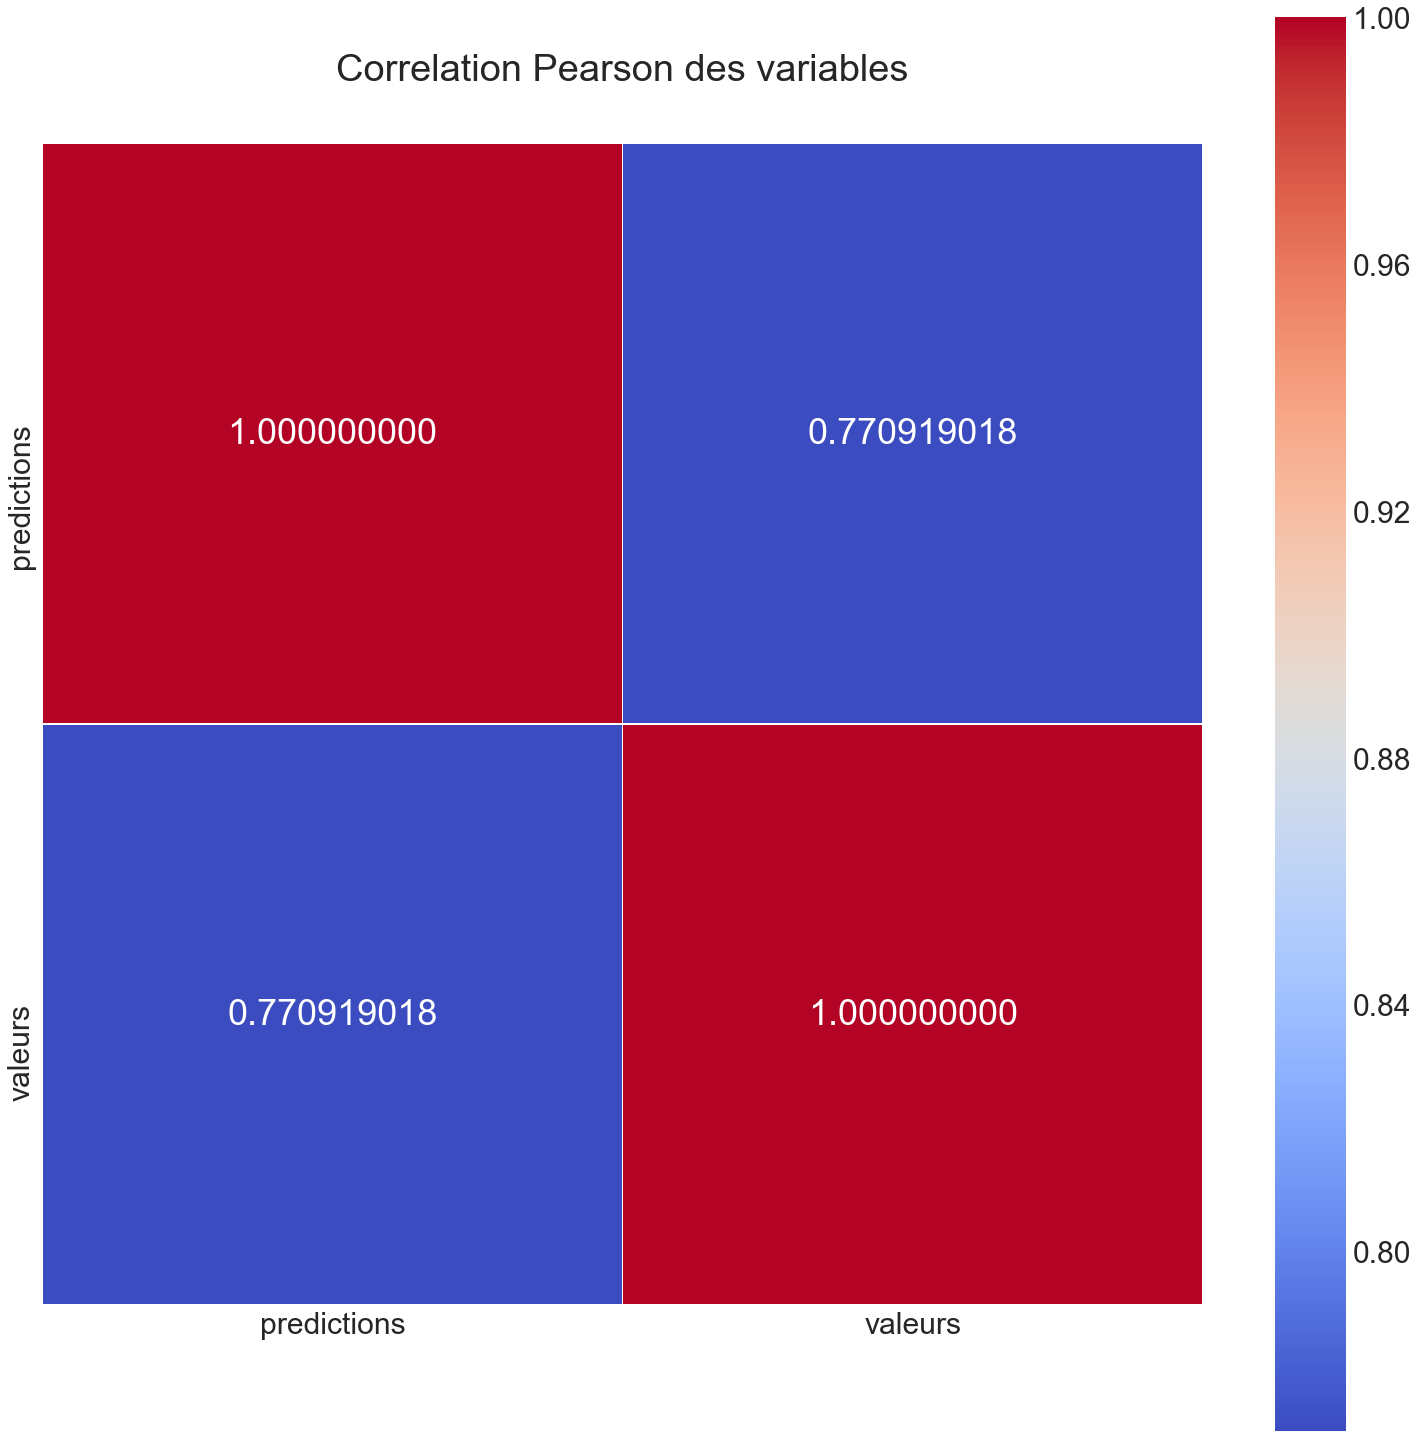

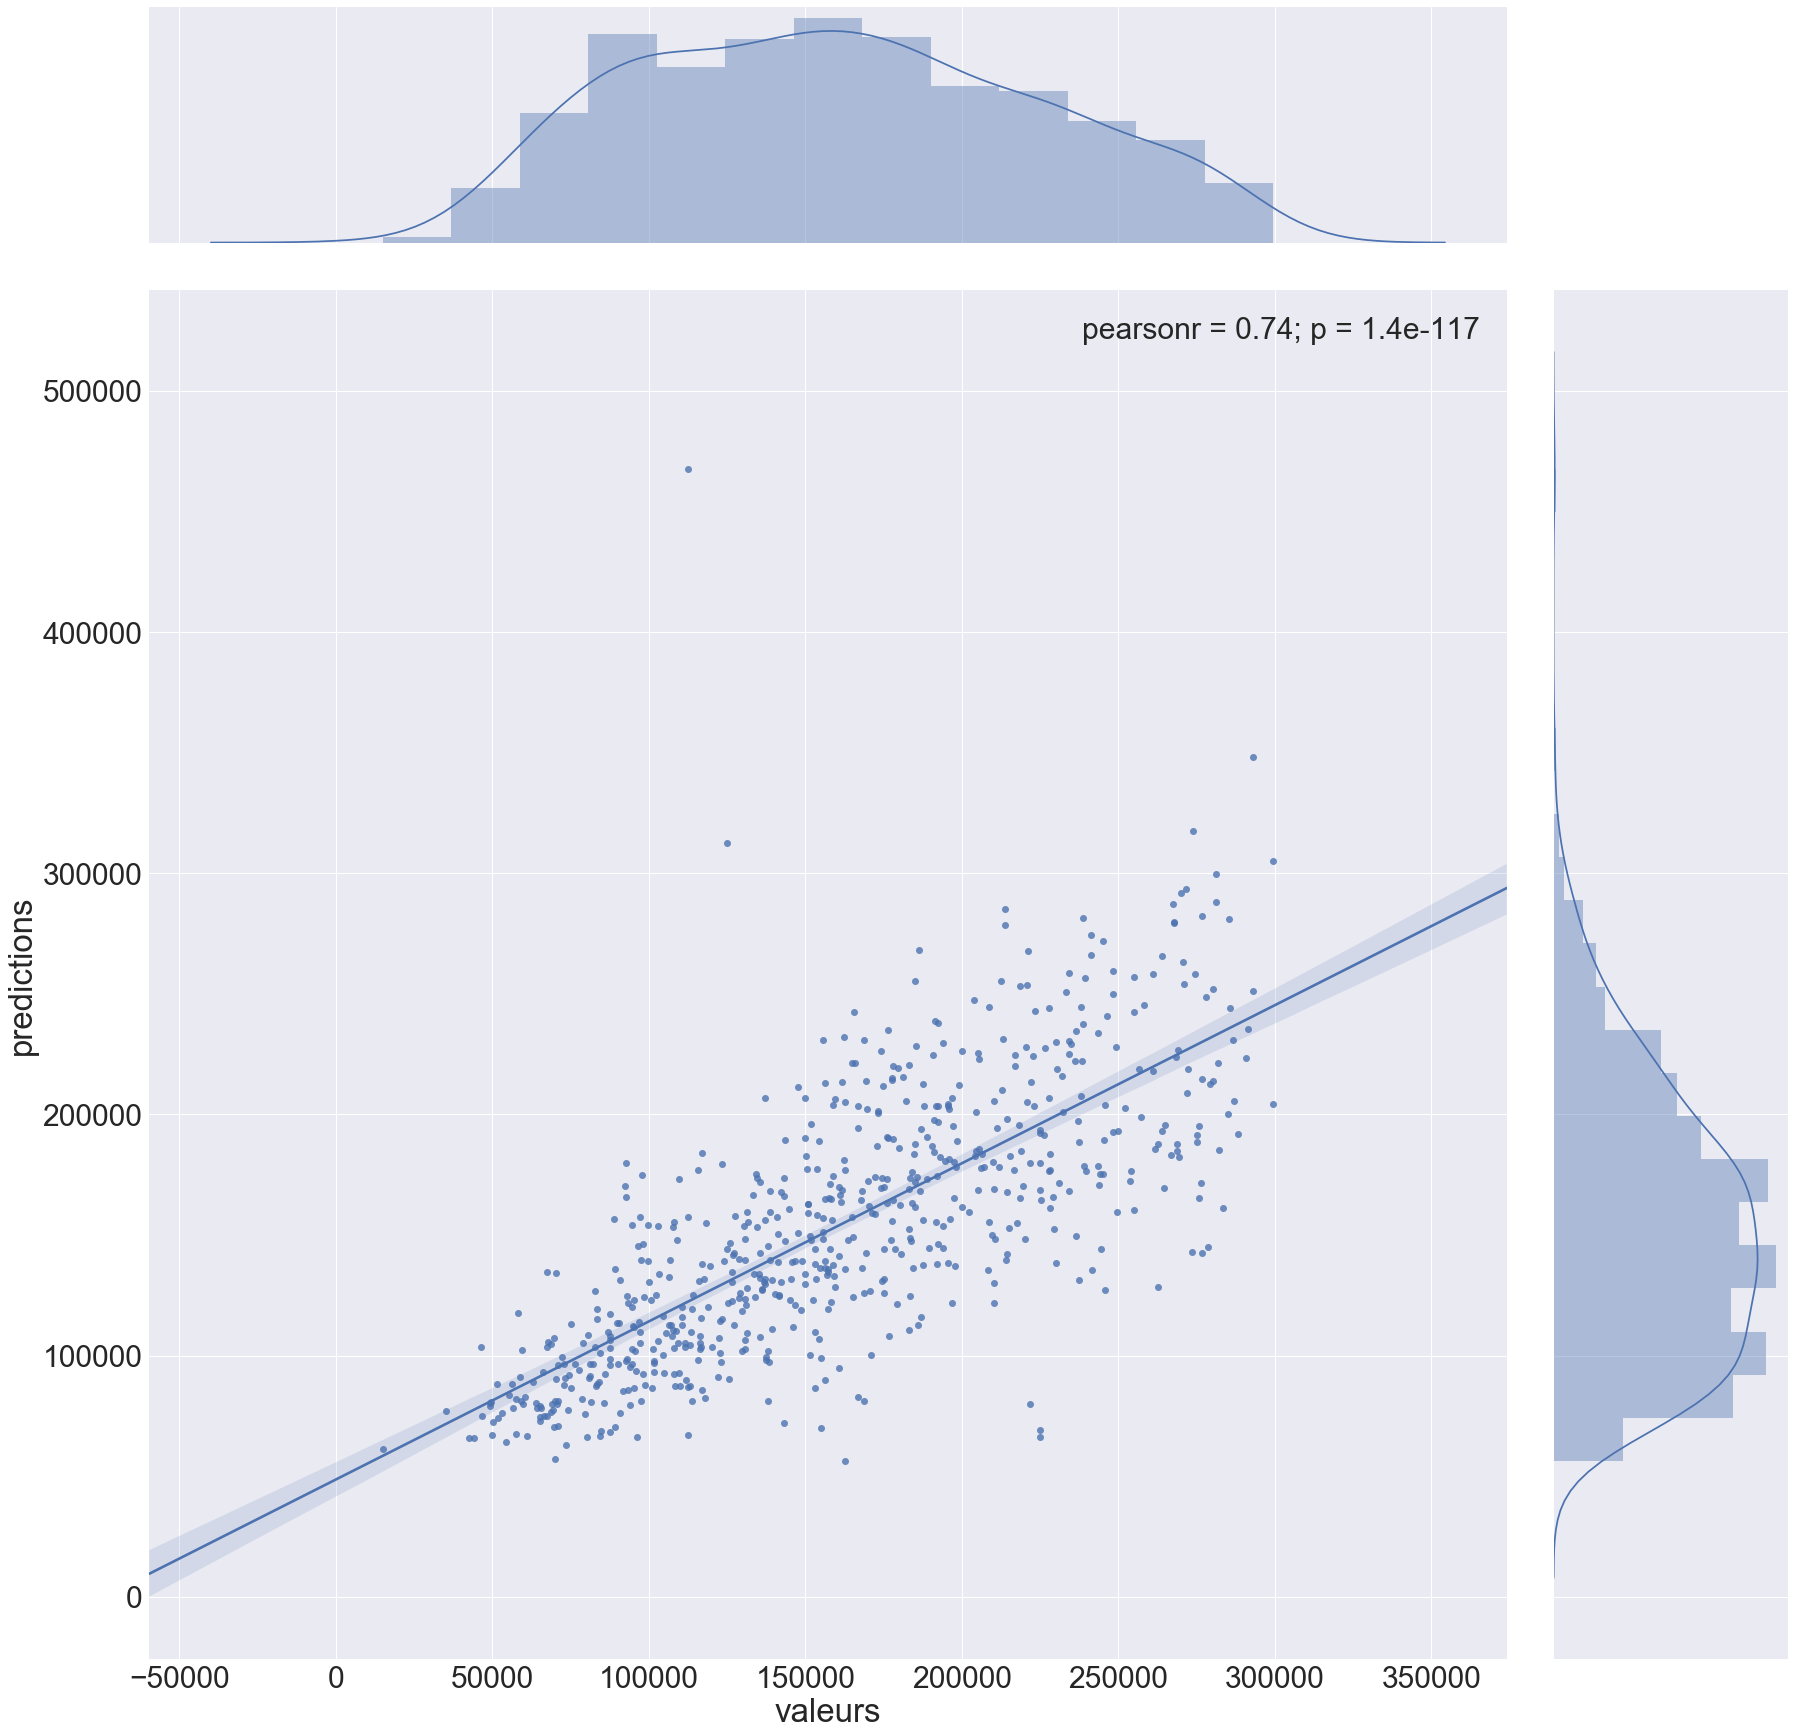

In [38]:
affichageMetricsSansLog(np.exp(yRegressions.Observations), 
                        np.exp(yRegressions.MLPRegressor))

In [ ]:
donnees.drop(columns='median_house_value'), donnees.median_house_value

In [39]:
from sklearn.svm import OneClassSVM
classifier = OneClassSVM(nu=0.1, gamma=0.001)
classifier.fit(donnees.drop(columns='median_house_value'))
y_pred = classifier.predict(donnees.drop(columns='median_house_value'))
sum(y_pred==-1)

2042

In [44]:
donnees[y_pred==1].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_0,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3,ocean_proximity_4
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,358500.0,1,0,0,0,0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,341300.0,1,0,0,0,0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,342200.0,1,0,0,0,0
5,-1.337296,1.037674,1.855769,-0.785965,-0.770978,-0.893015,-0.801574,0.087213,269700.0,1,0,0,0,0
6,-1.337296,1.032993,1.855769,-0.046450,-0.115979,-0.292051,0.038103,-0.111656,299200.0,1,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(donnees[y_pred==1].drop(columns='median_house_value'), 
                 np.log(donnees[y_pred==1].median_house_value), 
                 test_size=0.4, random_state=101)

In [46]:
resultats,yRegressions = calculRegressions(X_train, X_test, y_train, y_test)

Exécution  LinearRegression              : 0.00s  p = 0.830667795004
Exécution  PolynomialRegression2         : 0.05s  p = 0.865586407380
Exécution  BayesianRidge                 : 0.00s  p = 0.830569652270
Exécution  MLPRegressor                  : 0.75s  p = 0.830865850016
Exécution  SVR_linear                    : 2.54s  p = 0.825157679965
Exécution  SVR_rbf                       : 5.34s  p = 0.841701874942
Exécution  RandomForestRegressor         : 7.18s  p = 0.807739785518
Exécution  GradientBoostingRegressor     : 2.79s  p = 0.871601703008


In [49]:
resultats.sort_values('RMSE')

,RMSE,R,Pearson
PolynomialRegression2,0.273474,0.865526,0.865586
SVR_rbf,0.295454,0.840945,0.841702
MLPRegressor,0.303986,0.830683,0.830866
LinearRegression,0.304092,0.830552,0.830668
BayesianRidge,0.304169,0.830458,0.830570
SVR_linear,0.309908,0.823309,0.825158
RandomForestRegressor,0.321909,0.807716,0.807740
GradientBoostingRegressor,0.474646,0.494271,0.871602


Mean absolute error                 MAE   : 40031.170854
Median absolute error               MedAE : 26512.685270
Mean squared error                  MSE   : 3599121408.208114
Root mean squared error             RMSE  : 59992.677955
R² score  raw_values                R²    : 0.701752
R² score  uniform_average           R²    : 0.701752
R² score  variance_weighted         R²    : 0.701752
R  score  raw_values                R     : 0.837706
R  score  uniform_average           R     : 0.837706
R  score  variance_weighted         R     : 0.837706


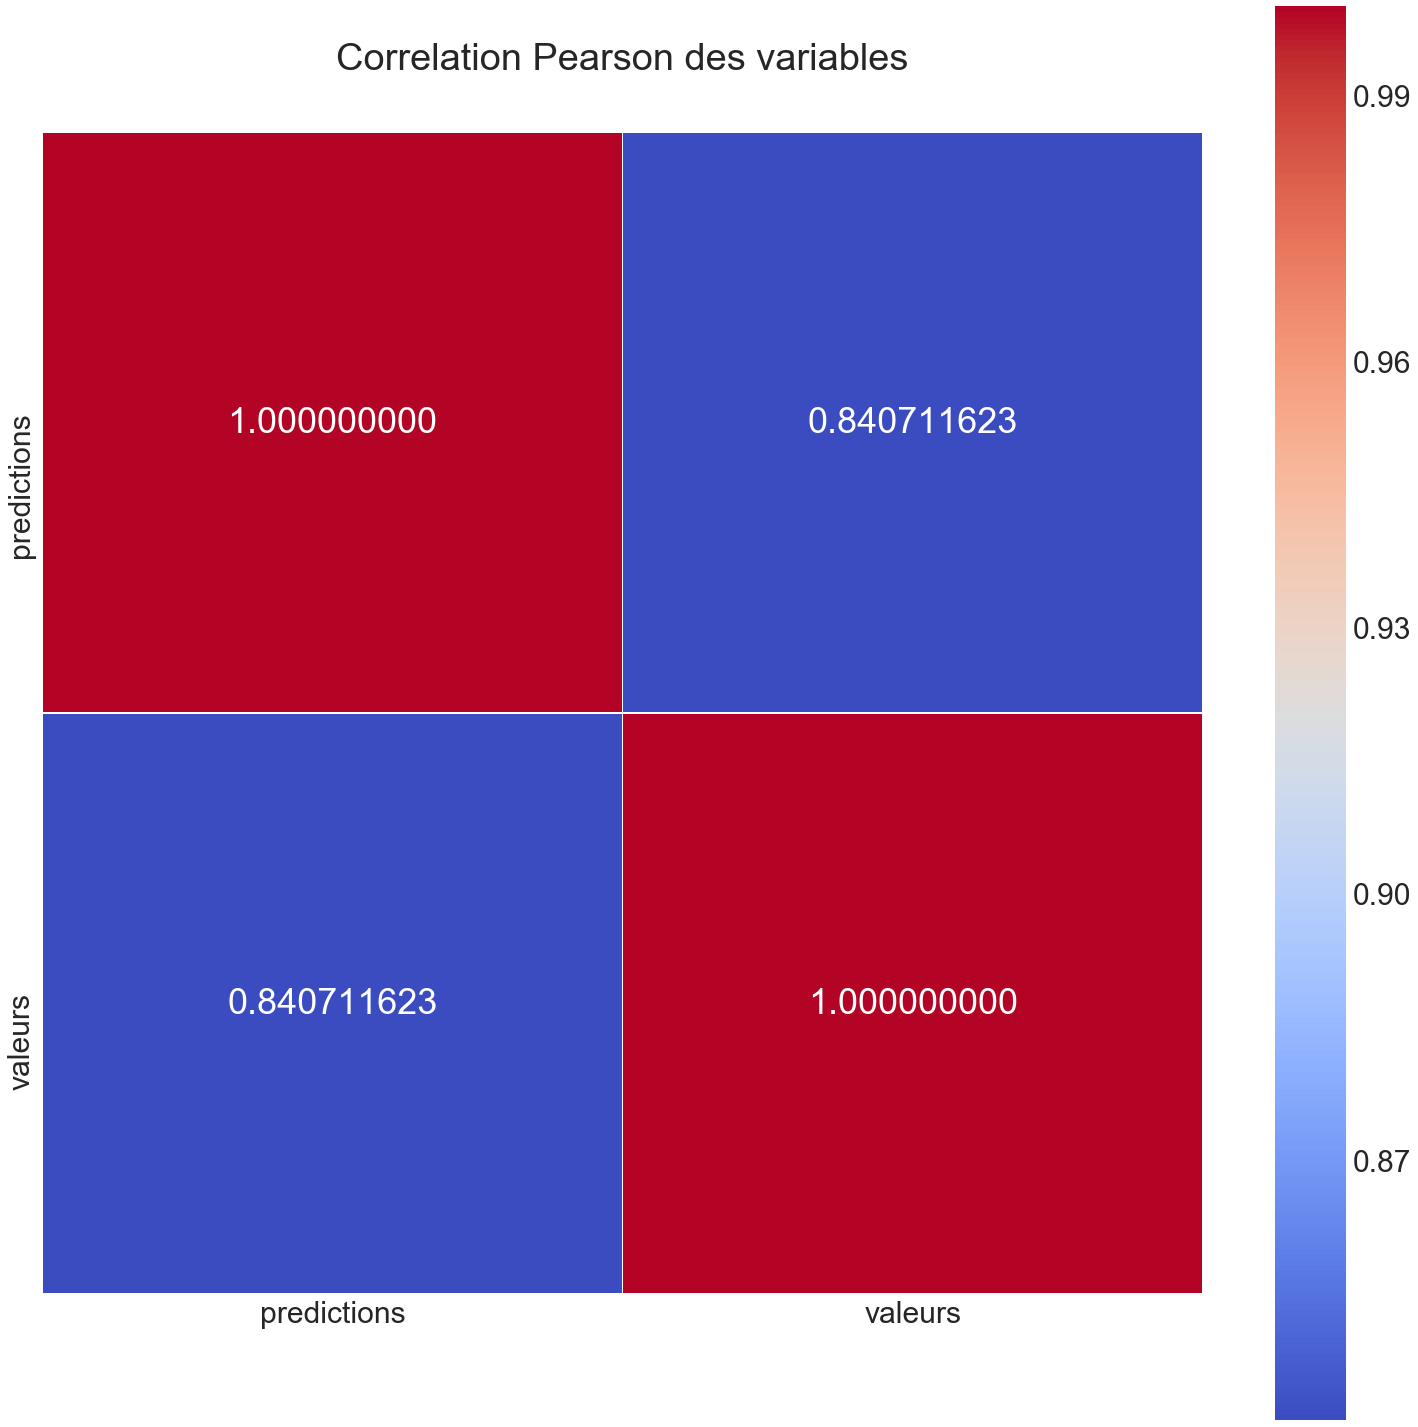

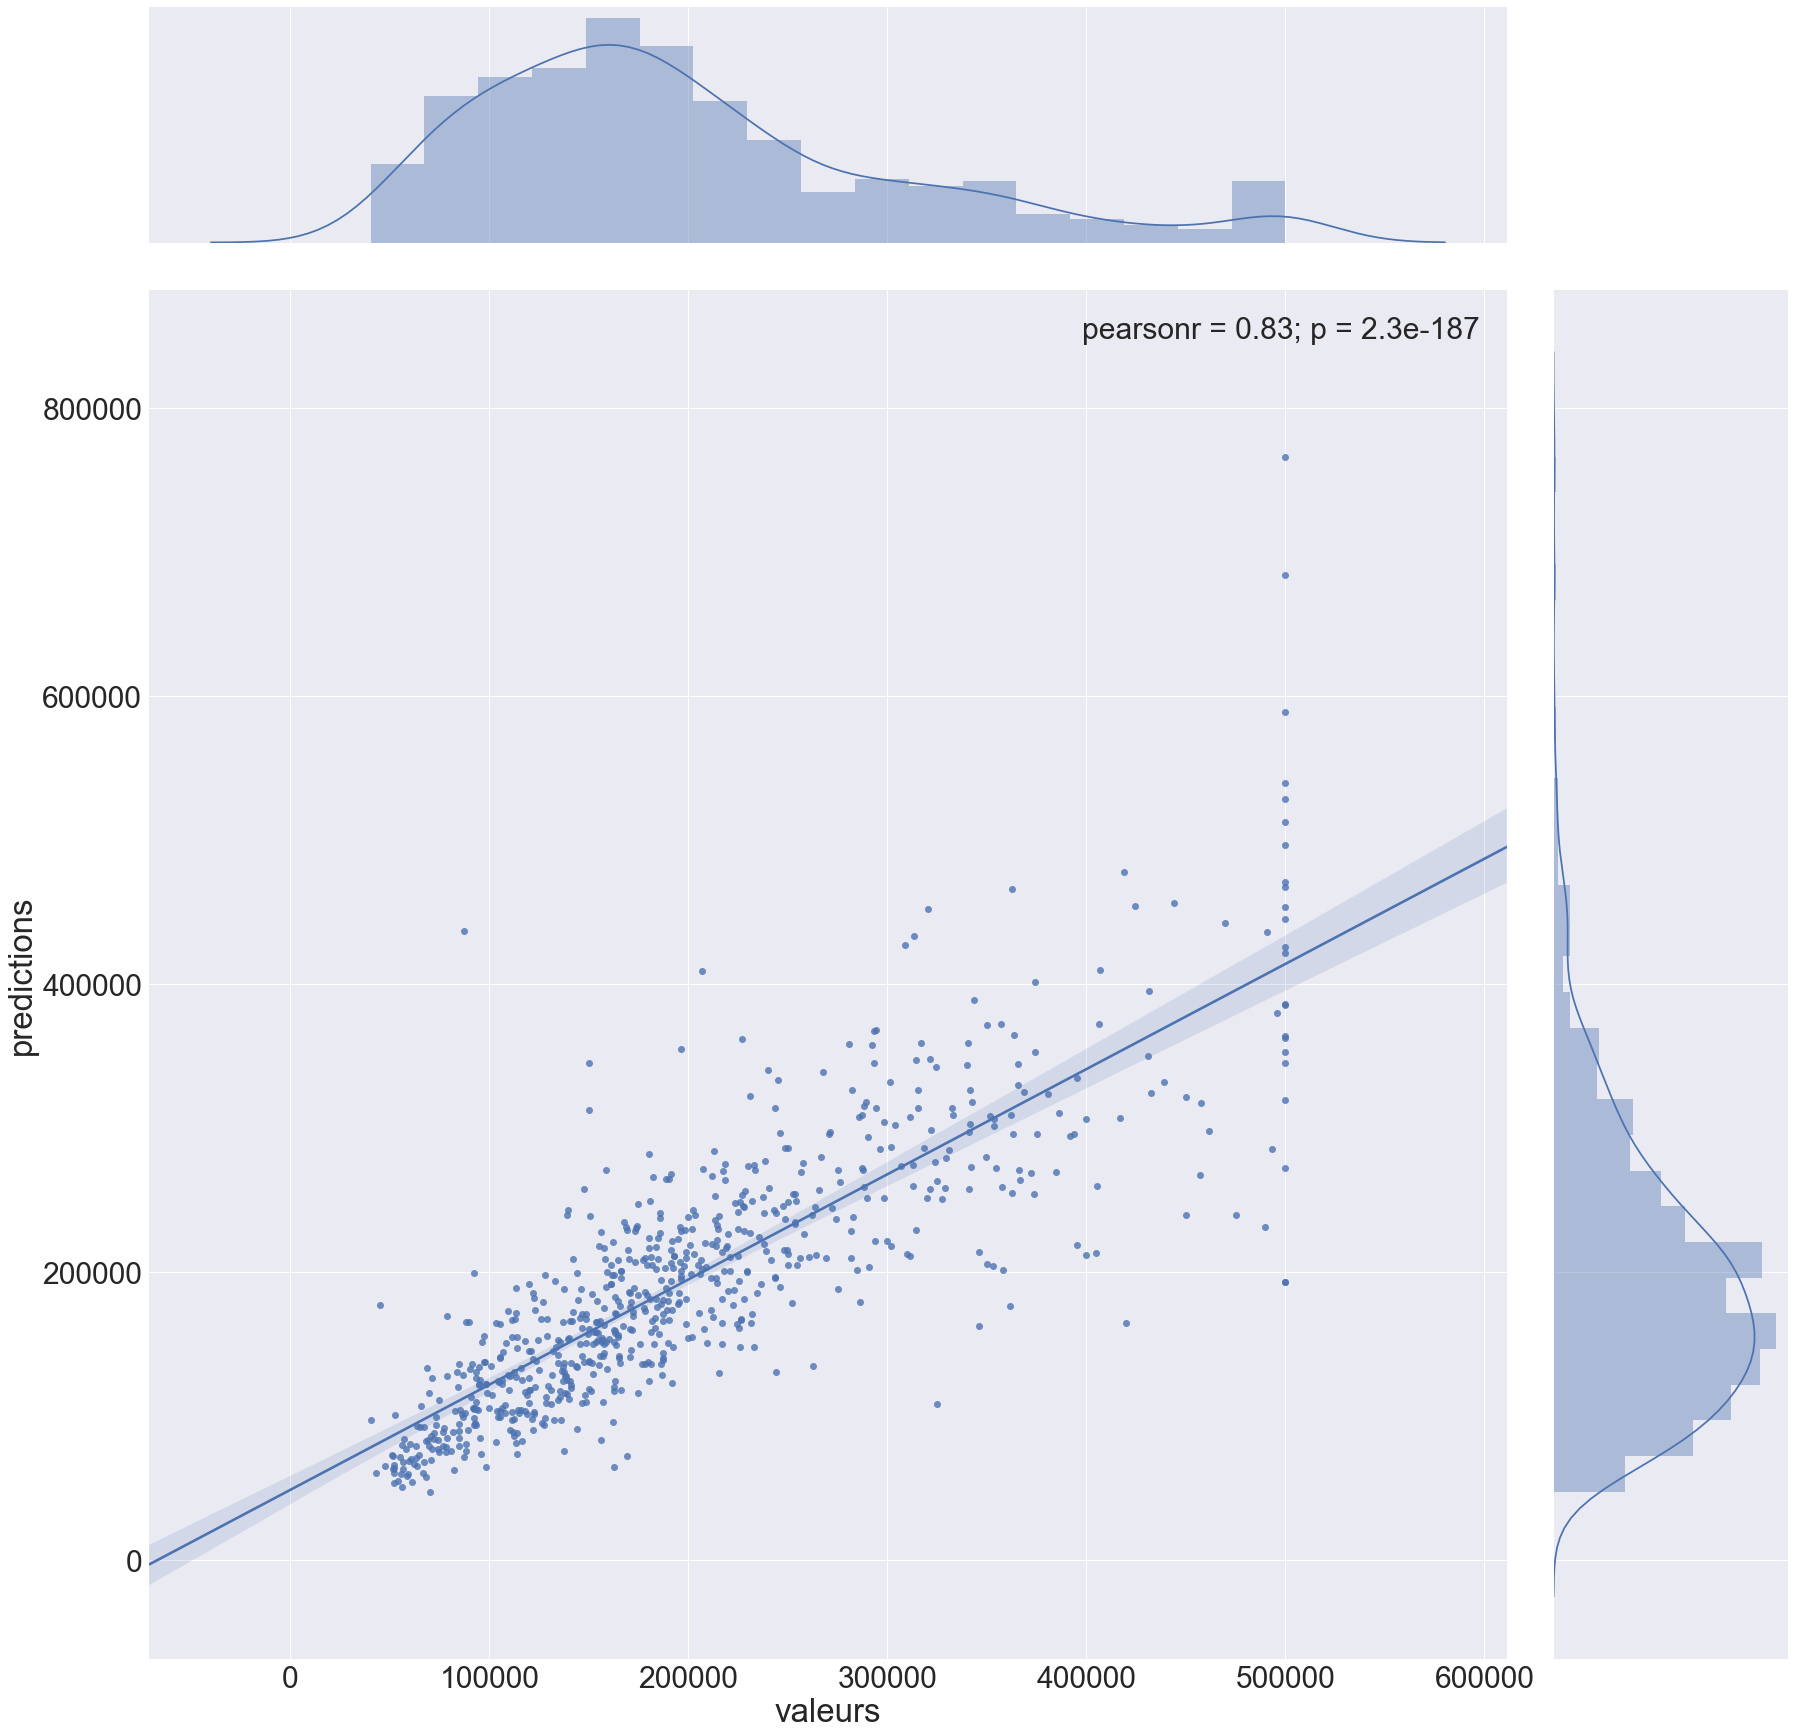

In [50]:
affichageMetricsSansLog(np.exp(yRegressions.Observations), 
                        np.exp(yRegressions.PolynomialRegression2))